In [ ]:
# imported libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
import seaborn as sns
import numpy as np

In [ ]:
# function to find the average of a list
def average_list(values):
    total = 0
    for i in range(0, len(values)):
        total += values[i]
    return total / len(values)

In [ ]:
# function to create graphs for sophs vs jrs vs srs
def lineplot_class(q, sophs, jrs, srs, band_factor=1):

    # compute average
    avg_sophs = np.mean(sophs)
    avg_jrs = np.mean(jrs)
    avg_srs = np.mean(srs)
    std_sophs = np.std(sophs, ddof=1)
    std_jrs = np.std(jrs, ddof=1)
    std_srs = np.std(srs, ddof=1)

    # x-axis points
    x = np.linspace(0, 1, 50)

    plt.figure(figsize=(6,4))

    # sophomore line plot & shaded region
    plt.plot(x, [avg_sophs]*len(x), color="blue", label="Sophomores")
    plt.fill_between(x,
                     [avg_sophs - band_factor*std_sophs]*len(x),
                     [avg_sophs + band_factor*std_sophs]*len(x),
                     alpha=0.2, color="blue")

    # junior line plot & shaded region
    plt.plot(x, [avg_jrs]*len(x), color="orange", label="Juniors")
    plt.fill_between(x,
                     [avg_jrs - band_factor*std_jrs]*len(x),
                     [avg_jrs + band_factor*std_jrs]*len(x),
                     alpha=0.2, color="orange")

    # senior line plot & shaded region
    plt.plot(x, [avg_srs]*len(x), color="green", label="Seniors")
    plt.fill_between(x,
                     [avg_srs - band_factor*std_srs]*len(x),
                     [avg_srs + band_factor*std_srs]*len(x),
                     alpha=0.2, color="green")

    # formats & graphs plot
    plt.xticks([])
    plt.ylabel("Mean Score")
    plt.xlabel("Class Standing")
    plt.title(f"{q}: Sophomores vs Juniors vs Seniors")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot all class levels on a graph beginning to end
def lineplot_beg_to_end_class(q, sophBeg, sophEnd, jrBeg, jrEnd, srBeg, srEnd, band_factor=1):
    # calculates averages
    sophAvgBeg = np.mean(sophBeg)
    sophAvgEnd = np.mean(sophEnd)
    jrAvgBeg = np.mean(jrBeg)
    jrAvgEnd = np.mean(jrEnd)
    srAvgBeg = np.mean(srBeg)
    srAvgEnd = np.mean(srEnd)

    # calculates standard deviations
    sophSTDBeg = np.std(sophBeg, ddof=1) if len(sophBeg) > 1 else 0
    sophSTDEnd = np.std(sophEnd, ddof=1) if len(sophEnd) > 1 else 0
    jrSTDBeg = np.std(jrBeg, ddof=1) if len(jrBeg) > 1 else 0
    jrSTDEnd = np.std(jrEnd, ddof=1) if len(jrEnd) > 1 else 0
    srSTDBeg = np.std(srBeg, ddof=1) if len(srBeg) > 1 else 0
    srSTDEnd = np.std(srEnd, ddof=1) if len(srEnd) > 1 else 0

    # creates dataframe to plot
    # sophomores
    dfSoph = pd.DataFrame({"x": [0, 1], "y": [sophAvgBeg, sophAvgEnd]})
    sd_overallSoph = np.asarray([sophSTDBeg, sophSTDEnd], dtype=float)

    # juniors
    dfJr = pd.DataFrame({"x": [0, 1], "y": [jrAvgBeg, jrAvgEnd]})
    sd_overallJr = np.asarray([jrSTDBeg, jrSTDEnd], dtype=float)

    # seniors
    dfSr = pd.DataFrame({"x": [0, 1], "y": [srAvgBeg, srAvgEnd]})
    sd_overallSr = np.asarray([srSTDBeg, srSTDEnd], dtype=float)

    # creates one plot
    plt.figure(figsize=(6,4))

    # Sophomore line + band
    sns.lineplot(data=dfSoph, x="x", y="y", marker="o", color="blue", label="Sophomore")
    x_o, y_o = dfSoph["x"].to_numpy(dtype=float), dfSoph["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overallSoph, y_o + band_factor*sd_overallSoph,
                     alpha=0.2, color="blue")

    # Junior line + band
    sns.lineplot(data=dfJr, x="x", y="y", marker="o", color="orange", label="Junior")
    x_o, y_o = dfJr["x"].to_numpy(dtype=float), dfJr["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overallJr, y_o + band_factor*sd_overallJr,
                     alpha=0.2, color="orange")

    # Senior line + band
    sns.lineplot(data=dfSr, x="x", y="y", marker="o", color="green", label="Senior")
    x_o, y_o = dfSr["x"].to_numpy(dtype=float), dfSr["y"].to_numpy(dtype=float)
    plt.fill_between(x_o, y_o - band_factor*sd_overallSr, y_o + band_factor*sd_overallSr,
                     alpha=0.2, color="green")

    # plots graph
    plt.xticks([0, 1], ["Beginning", "End"])
    plt.ylabel("Mean Score")
    plt.xlabel("Point In Semester")
    plt.title(f"{q}: Beginning vs End")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# function to add a column for class standing
def map_class_standing(val):
    responses = str(val).split(",")

    if "3" in responses:
        return "Sophomore"
    elif "4" in responses:
        return "Junior"
    elif "5" in responses:
        return "Senior"
    else:
        return None


In [ ]:
# function to use Kruskal-Wallis test
def kruskalTest(data1, data2, *args):
    h_stat, p_value = kruskal(data1, data2, *args)

    print(f"Kruskal-Wallis H-Statistic: {h_stat}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists \n")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists \n")

In [ ]:
# function to use Mann whitney test
def UTest(data1, data2):
    u_value, p_value = mannwhitneyu(data1, data2)

    print(f"Mann-Whitney U-Value: {u_value}")
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: Significant differences exists\n")
    else:
        print("Fail to reject the null hypothesis: No significant differences exists\n")

In [ ]:
# reads file
data = pd.read_excel('updateDataset.xlsx', header = 1)

In [ ]:
# calls function to create new column for class standing
data["Class Standing Label"] = data["Q27"].apply(map_class_standing)

In [ ]:
# prints first 5 rows
data.head()

,StartDate,EndDate,B/E?,Q19,Q23,Q23_9_TEXT,Q24,Q27,Q3_1,Q3_2,...,Q26_7,Q26_8,Q26_9,Q26_10,Q26_11,Q26_12,Q26_13,Q26_14,Q26_14_TEXT,Class Standing Label
0,2022-10-05 11:23:26,2022-10-05 11:23:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2022-12-01 17:33:00,2022-12-01 17:36:48,End,Student 1,4.0,NaN,male,5,5.0,5.0,...,3.0,2.0,4.0,4.0,3.0,4.0,3.0,NaN,NaN,Senior
2,2022-10-05 11:22:17,2022-10-05 11:25:34,Beginning,Student 1,8.0,NaN,Male,5,5.0,5.0,...,3.0,3.0,3.0,3.0,3.0,5.0,3.0,NaN,NaN,Senior
3,2022-12-03 16:03:10,2022-12-03 16:07:19,End,Student 2,9.0,middle eastern,male,5,NaN,NaN,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,NaN,NaN,Senior
4,2022-10-05 11:33:24,2022-10-05 11:42:06,Beginning,Student 2,9.0,Middle Eastern,Man,5,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,Senior


In [ ]:
# START OF QUESTION 3

In [ ]:
# Q3_1
# mean for Q3_1
Q3_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_1"].mean()
print("Q3_1 Mean", Q3_1_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()
senior_beg_Q3_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()
sophomore_beg_Q3_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_1"].dropna()

junior_end_Q3_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_1"].dropna()
senior_end_Q3_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_1"].dropna()
sophomore_end_Q3_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_1, senior_beg_Q3_1, sophomore_end_Q3_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level")
kruskalTest(junior_end_Q3_1, senior_end_Q3_1, sophomore_end_Q3_1)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_1, junior_end_Q3_1)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_1, senior_end_Q3_1)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_1, sophomore_end_Q3_1)


Q3_1 Mean Class Standing Label  B/E?     
Junior                Beginning    3.750000
                      End          3.714286
Senior                Beginning    3.945946
                      End          3.714286
Sophomore             Beginning    3.636364
                      End          3.888889
Name: Q3_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.2816340996211831
P-value: 0.8686482165171323
Fail to reject the null hypothesis: No significant differences exists 

End Class Level
Kruskal-Wallis H-Statistic: 0.23587727846404877
P-value: 0.8887505853599711
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 28.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 577.0
P-value: 0.41575830021694815
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 40.0
P-value: 0.4511063716366648
Fail to

In [ ]:
# Q3_2
# mean for Q3_2
Q3_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_2"].mean()
print("Q3_2 Mean", Q3_2_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()
senior_beg_Q3_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()
sophomore_beg_Q3_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_2"].dropna()

junior_end_Q3_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_2"].dropna()
senior_end_Q3_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_2"].dropna()
sophomore_end_Q3_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_2, senior_beg_Q3_2, sophomore_end_Q3_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_2, senior_end_Q3_2, sophomore_end_Q3_2)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_2, junior_end_Q3_2)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_2, senior_end_Q3_2)

# U-Test for Sophomores
print("Sophomores")
UTest(sophomore_beg_Q3_2, sophomore_end_Q3_2)

Q3_2 Mean Class Standing Label  B/E?     
Junior                Beginning    3.250000
                      End          4.142857
Senior                Beginning    4.324324
                      End          4.172414
Sophomore             Beginning    4.454545
                      End          4.333333
Name: Q3_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 5.283740650435084
P-value: 0.07122792551161479
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.09461322087454895
P-value: 0.9537949092784739
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 17.0
P-value: 0.20948237571633044
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 573.0
P-value: 0.6126351454157046
Fail to reject the null hypothesis: No significant differences exists

Sophomores
Mann-Whitney U-Value: 53.0
P-value: 0.797078621

In [ ]:
# Q3_3
# mean for Q3_3
Q3_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_3"].mean()
print("Q3_3 Mean", Q3_3_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()
senior_beg_Q3_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()
sophomore_beg_Q3_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_3"].dropna()

junior_end_Q3_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_3"].dropna()
senior_end_Q3_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_3"].dropna()
sophomore_end_Q3_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_3, senior_beg_Q3_3, sophomore_end_Q3_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_3, senior_end_Q3_3, sophomore_end_Q3_3)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_3, junior_end_Q3_3)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_3, senior_end_Q3_3)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_3, sophomore_end_Q3_3)

Q3_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    4.108108
                      End          4.068966
Sophomore             Beginning    4.272727
                      End          4.111111
Name: Q3_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.09187739774958273
P-value: 0.9551005091320968
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.0094921786459438
P-value: 0.9952651555621821
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 28.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 572.0
P-value: 0.6295221457816189
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 56.0
P-value: 0.624729605340242
Fail to 

In [ ]:
# Q3_4
# mean for Q3_4
Q3_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_4"].mean()
print("Q3_4 Mean", Q3_4_result, "\n")

# creates dataframe for each class level
junior_beg_Q3_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()
senior_beg_Q3_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()
sophomore_beg_Q3_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_4"].dropna()

junior_end_Q3_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_4"].dropna()
senior_end_Q3_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_4"].dropna()
sophomore_end_Q3_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_4, senior_beg_Q3_4, sophomore_end_Q3_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_4, senior_end_Q3_4, sophomore_end_Q3_4)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_4, junior_end_Q3_4)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_4, senior_end_Q3_4)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_4, sophomore_end_Q3_4)

Q3_4 Mean Class Standing Label  B/E?     
Junior                Beginning    3.750000
                      End          4.285714
Senior                Beginning    4.108108
                      End          4.034483
Sophomore             Beginning    3.909091
                      End          3.888889
Name: Q3_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.6692688163276223
P-value: 0.7155996559279827
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.7218503770227664
P-value: 0.697031142453743
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 22.5
P-value: 0.5406959094360969
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 588.0
P-value: 0.4839246369179223
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 50.0
P-value: 1.0
Fail to r

In [ ]:
# Q3_5
# mean for Q3_5
Q3_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_5"].mean()
print("Q3_5 Mean", Q3_5_result, "\n")

# creates dataframe for each class level
junior_beg_Q3_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()
senior_beg_Q3_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()
sophomore_beg_Q3_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_5"].dropna()

junior_end_Q3_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_5"].dropna()
senior_end_Q3_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_5"].dropna()
sophomore_end_Q3_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_5, senior_beg_Q3_5, sophomore_end_Q3_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_5, senior_end_Q3_5, sophomore_end_Q3_5)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_5, junior_end_Q3_5)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_5, senior_end_Q3_5)

# U-Test for Sophomores
print("Sophomores:")
kruskalTest(sophomore_beg_Q3_5, sophomore_end_Q3_5)

Q3_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.125000
                      End          4.428571
Senior                Beginning    4.135135
                      End          4.103448
Sophomore             Beginning    4.090909
                      End          4.111111
Name: Q3_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.07259276075808271
P-value: 0.9643544353907594
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.1167467412678127
P-value: 0.5721389653837852
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 23.0
P-value: 0.5693166099801126
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 561.5
P-value: 0.7342980888206989
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Kruskal-Wallis H-Statistic: 0.00685425685426066

In [ ]:
# Q3_6
# mean for Q3_6
Q3_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_6"].mean()
print("Q3_6 Mean", Q3_6_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()
senior_beg_Q3_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()
sophomore_beg_Q3_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_6"].dropna()

junior_end_Q3_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_6"].dropna()
senior_end_Q3_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_6"].dropna()
sophomore_end_Q3_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_6, senior_beg_Q3_6, sophomore_end_Q3_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_6, senior_end_Q3_6, sophomore_end_Q3_6)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_6, junior_end_Q3_6)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_6, senior_end_Q3_6)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_6, sophomore_end_Q3_6)

Q3_6 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    4.189189
                      End          3.964286
Sophomore             Beginning    4.636364
                      End          4.222222
Name: Q3_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.40760647416319334
P-value: 0.8156228397299072
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.4453545958671991
P-value: 0.8003730896748902
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 26.5
P-value: 0.9008313639128621
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 599.5
P-value: 0.25086394559419256
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 66.5
P-value: 0.15729920

In [ ]:
# Q3_7
# mean for Q3_7
Q3_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_7"].mean()
print("Q3_7 Mean", Q3_7_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()
senior_beg_Q3_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()
sophomore_beg_Q3_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_7"].dropna()

junior_end_Q3_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_7"].dropna()
senior_end_Q3_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_7"].dropna()
sophomore_end_Q3_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_7, senior_beg_Q3_7, sophomore_end_Q3_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_7, senior_end_Q3_7, sophomore_end_Q3_7)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_7, junior_end_Q3_7)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_7, senior_end_Q3_7)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_7, sophomore_end_Q3_7)

Q3_7 Mean Class Standing Label  B/E?     
Junior                Beginning    3.750000
                      End          4.000000
Senior                Beginning    4.270270
                      End          4.034483
Sophomore             Beginning    4.363636
                      End          4.000000
Name: Q3_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.3494723256942613
P-value: 0.3089004683577693
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.022809832084495985
P-value: 0.9886598734724783
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 27.0
P-value: 0.9516507699020015
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 634.5
P-value: 0.17657992575040082
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 63.5
P-value: 0.2604910

In [ ]:
# Q3_8
# mean for Q3_8
Q3_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_8"].mean()
print("Q3_8 Mean", Q3_8_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()
senior_beg_Q3_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()
sophomore_beg_Q3_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_8"].dropna()

junior_end_Q3_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_8"].dropna()
senior_end_Q3_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_8"].dropna()
sophomore_end_Q3_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_8, senior_beg_Q3_8, sophomore_end_Q3_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_8, senior_end_Q3_8, sophomore_end_Q3_8)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_8, junior_end_Q3_8)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_8, senior_end_Q3_8)

# U-Test for Sophomores
print("Sophomores")
UTest(sophomore_beg_Q3_8, sophomore_end_Q3_8)

Q3_8 Mean Class Standing Label  B/E?     
Junior                Beginning    3.875000
                      End          4.142857
Senior                Beginning    4.351351
                      End          3.964286
Sophomore             Beginning    4.454545
                      End          4.000000
Name: Q3_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.8865746380693054
P-value: 0.23615018032547416
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.21421759248651653
P-value: 0.8984279220901749
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 27.0
P-value: 0.94735090135121
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 648.0
P-value: 0.06445466843884184
Fail to reject the null hypothesis: No significant differences exists

Sophomores
Mann-Whitney U-Value: 67.0
P-value: 0.1596699364

In [ ]:
# Q3_9
# mean for Q3_9
Q3_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_9"].mean()
print("Q3_9 Mean", Q3_9_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()
senior_beg_Q3_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()
sophomore_beg_Q3_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_9"].dropna()

junior_end_Q3_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_9"].dropna()
senior_end_Q3_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_9"].dropna()
sophomore_end_Q3_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_9, senior_beg_Q3_9, sophomore_end_Q3_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_9, senior_end_Q3_9, sophomore_end_Q3_9)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_9, junior_end_Q3_9)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_9, senior_end_Q3_9)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q3_9, sophomore_end_Q3_9)

Q3_9 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          3.857143
Senior                Beginning    3.945946
                      End          3.724138
Sophomore             Beginning    3.818182
                      End          4.000000
Name: Q3_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.12463095521739188
P-value: 0.939586421552041
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.4264768171189662
P-value: 0.8079634888414005
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 31.5
P-value: 0.716004795504331
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 590.0
P-value: 0.46925690887651506
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 43.5
P-value: 0.6567725136

In [ ]:
# Q3_10
# mean for Q3_10
Q3_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_10"].mean()
print("Q3_10 Mean", Q3_10_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()
senior_beg_Q3_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()
sophomore_beg_Q3_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_10"].dropna()

junior_end_Q3_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_10"].dropna()
senior_end_Q3_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_10"].dropna()
sophomore_end_Q3_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_10, senior_beg_Q3_10, sophomore_end_Q3_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_10, senior_end_Q3_10, sophomore_end_Q3_10)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_10, junior_end_Q3_10)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_10, senior_end_Q3_10)

# U-Test for Sophomores
print("Sophomores")
UTest(sophomore_beg_Q3_10, sophomore_end_Q3_10)

Q3_10 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.428571
Senior                Beginning    4.189189
                      End          4.137931
Sophomore             Beginning    4.363636
                      End          4.333333
Name: Q3_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.11671706965082312
P-value: 0.9433116767121859
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.8615627739299081
P-value: 0.6500009939336351
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 24.0
P-value: 0.6627357462059104
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 579.5
P-value: 0.556014347961661
Fail to reject the null hypothesis: No significant differences exists

Sophomores
Mann-Whitney U-Value: 52.5
P-value: 0.828793109

In [ ]:
# Q3_11
# mean for Q3_11
Q3_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q3_11"].mean()
print("Q3_11 Mean", Q3_11_result, "\n")

# creates dataframes for each class level
junior_beg_Q3_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()
senior_beg_Q3_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()
sophomore_beg_Q3_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q3_11"].dropna()

junior_end_Q3_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q3_11"].dropna()
senior_end_Q3_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q3_11"].dropna()
sophomore_end_Q3_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q3_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q3_11, senior_beg_Q3_11, sophomore_end_Q3_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q3_11, senior_end_Q3_11, sophomore_end_Q3_11)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q3_11, junior_end_Q3_11)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q3_11, senior_end_Q3_11)

# U-Test for Sophomores
print("Sophomores")
UTest(sophomore_beg_Q3_11, sophomore_end_Q3_11)

Q3_11 Mean Class Standing Label  B/E?     
Junior                Beginning    3.875000
                      End          4.428571
Senior                Beginning    4.000000
                      End          3.896552
Sophomore             Beginning    3.909091
                      End          3.777778
Name: Q3_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.5947572041732245
P-value: 0.7427627475954883
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 2.1470062084054233
P-value: 0.3418090250398225
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.0
P-value: 0.2756682158059781
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 571.0
P-value: 0.6431661612924154
Fail to reject the null hypothesis: No significant differences exists

Sophomores
Mann-Whitney U-Value: 53.5
P-value: 0.769479571

In [ ]:
# START OF QUESTION 6

In [ ]:
# Q6_1
# mean for Q6_1
Q6_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_1"].mean()
print("Q6_1 Mean", Q6_1_result, "\n")

# creates dataframes for each class level
junior_beg_Q6_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()
senior_beg_Q6_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()
sophomore_beg_Q6_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_1"].dropna()

junior_end_Q6_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_1"].dropna()
senior_end_Q6_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_1"].dropna()
sophomore_end_Q6_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_1, senior_beg_Q6_1, sophomore_end_Q6_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_1, senior_end_Q6_1, sophomore_end_Q6_1)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_1, junior_end_Q6_1)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_1, senior_end_Q6_1)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_1, sophomore_end_Q6_1)

Q6_1 Mean Class Standing Label  B/E?     
Junior                Beginning    2.142857
                      End          3.142857
Senior                Beginning    3.354839
                      End          3.228571
Sophomore             Beginning    2.400000
                      End          3.375000
Name: Q6_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 6.361480126498737
P-value: 0.04155489049140715
Reject the null hypothesis: Significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.29700505639827407
P-value: 0.8619978278655793
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 9.0
P-value: 0.025066227739389435
Reject the null hypothesis: Significant differences exists

Seniors:
Mann-Whitney U-Value: 582.5
P-value: 0.5971710473597411
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 21.0
P-value: 0.07008757773684611
Fail to reje

Q6_1: Soph Beginning Avg: 2.4
Q6_1: Jr Beginning Avg: 2.142857142857143
Q6_1: Sr Beginning Avg: 3.3548387096774195
0.8
0.8329931278350429
1.1513915030693385


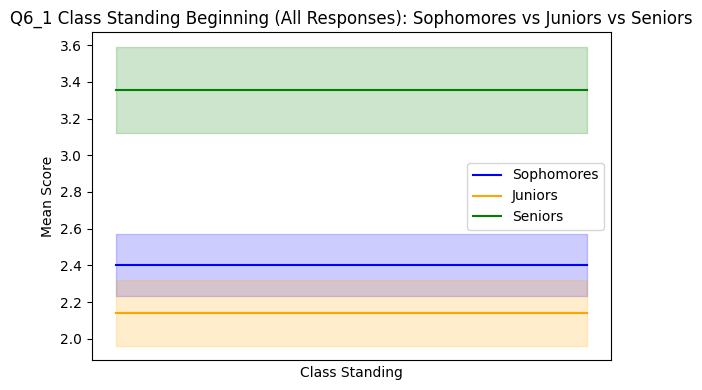

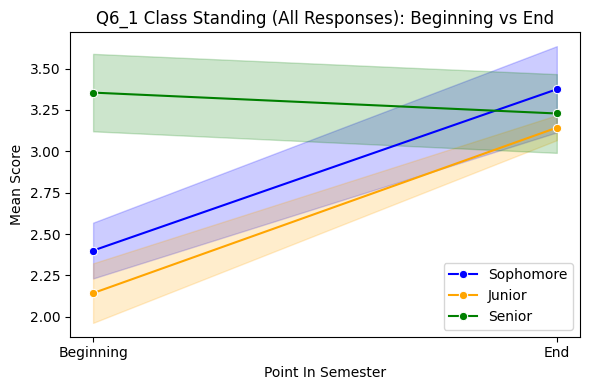

In [ ]:
# calculate means and standard deviations of Q6_1 and creates graphs
Q6_1_sophsAvg   = average_list(sophomore_beg_Q6_1.tolist())
Q6_1_jrsAvg   = average_list(junior_beg_Q6_1.tolist())
Q6_1_srsAvg   = average_list(senior_beg_Q6_1.tolist())

Q6_1_sophSTD = np.std(sophomore_beg_Q6_1.tolist())
Q6_1_jrSTD = np.std(junior_beg_Q6_1.tolist())
Q6_1_srSTD = np.std(senior_beg_Q6_1.tolist())


print(f"Q6_1: Soph Beginning Avg: {Q6_1_sophsAvg}")
print(f"Q6_1: Jr Beginning Avg: {Q6_1_jrsAvg}")
print(f"Q6_1: Sr Beginning Avg: {Q6_1_srsAvg}")

print(Q6_1_sophSTD)
print(Q6_1_jrSTD)
print(Q6_1_srSTD)

lineplot_class("Q6_1 Class Standing Beginning (All Responses)", sophs=sophomore_beg_Q6_1, jrs=junior_beg_Q6_1, srs=senior_beg_Q6_1, band_factor=0.2)

lineplot_beg_to_end_class("Q6_1 Class Standing (All Responses)", sophomore_beg_Q6_1, sophomore_end_Q6_1, junior_beg_Q6_1, junior_end_Q6_1, senior_beg_Q6_1, senior_end_Q6_1, band_factor=0.2)

In [ ]:
# Q6_2
# mean for Q6_2
Q6_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_2"].mean()
print("Q6_2 Mean", Q6_2_result, "\n")

# create dataframes for each class level
junior_beg_Q6_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()
senior_beg_Q6_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()
sophomore_beg_Q6_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_2"].dropna()

junior_end_Q6_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_2"].dropna()
senior_end_Q6_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_2"].dropna()
sophomore_end_Q6_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_2, senior_beg_Q6_2, sophomore_end_Q6_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_2, senior_end_Q6_2, sophomore_end_Q6_2)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_2, junior_end_Q6_2)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_2, senior_end_Q6_2)

# U-Test for Sophomores
print("Sophomores")
UTest(sophomore_beg_Q6_2, sophomore_end_Q6_2)

Q6_2 Mean Class Standing Label  B/E?     
Junior                Beginning    3.857143
                      End          4.142857
Senior                Beginning    4.129032
                      End          4.057143
Sophomore             Beginning    3.600000
                      End          4.375000
Name: Q6_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.357700156188795
P-value: 0.507199897426278
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.1282894736841904
P-value: 0.5688464521813965
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 20.0
P-value: 0.5880025905426141
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 580.0
P-value: 0.613035331975649
Fail to reject the null hypothesis: No significant differences exists

Sophomores
Mann-Whitney U-Value: 18.5
P-value: 0.04737576680034

In [ ]:
# Q6_3
# mean for Q6_3
Q6_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_3"].mean()
print("Q6_3 Mean", Q6_3_result, "\n")

# create dataframes for each class level
junior_beg_Q6_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()
senior_beg_Q6_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()
sophomore_beg_Q6_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_3"].dropna()

junior_end_Q6_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_3"].dropna()
senior_end_Q6_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_3"].dropna()
sophomore_end_Q6_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_3, senior_beg_Q6_3, sophomore_end_Q6_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_3, senior_end_Q6_3, sophomore_end_Q6_3)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_3, junior_end_Q6_3)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_3, senior_end_Q6_3)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_3, sophomore_end_Q6_3)

Q6_3 Mean Class Standing Label  B/E?     
Junior                Beginning    3.000000
                      End          3.428571
Senior                Beginning    3.483871
                      End          3.485714
Sophomore             Beginning    2.400000
                      End          3.625000
Name: Q6_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.7697681790015722
P-value: 0.2503528166299407
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.2993555494354132
P-value: 0.8609853629838146
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.5
P-value: 0.19876460637323512
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 537.0
P-value: 0.9446060216729654
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 13.0
P-value: 0.012957106

In [ ]:
# Q6_4
# mean for Q6_4
Q6_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_4"].mean()
print("Q6_4 Mean", Q6_4_result, "\n")

# create dataframes for each class level
junior_beg_Q6_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()
senior_beg_Q6_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()
sophomore_beg_Q6_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_4"].dropna()

junior_end_Q6_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_4"].dropna()
senior_end_Q6_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_4"].dropna()
sophomore_end_Q6_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_4, senior_beg_Q6_4, sophomore_end_Q6_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_4, senior_end_Q6_4, sophomore_end_Q6_4)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_4, junior_end_Q6_4)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_4, senior_end_Q6_4)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_4, sophomore_end_Q6_4)

Q6_4 Mean Class Standing Label  B/E?     
Junior                Beginning    3.857143
                      End          3.857143
Senior                Beginning    4.290323
                      End          4.257143
Sophomore             Beginning    4.500000
                      End          4.250000
Name: Q6_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.4658309659445732
P-value: 0.4805060387695076
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.383958978328147
P-value: 0.5005841867064529
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 25.5
P-value: 0.946664686585421
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 570.5
P-value: 0.6993779539016611
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 47.5
P-value: 0.483927304446

In [ ]:
# Q6_5
# mean for Q6_5
Q6_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_5"].mean()
print("Q6_5 Mean", Q6_5_result, "\n")

# create dataframes for each class level
junior_beg_Q6_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()
senior_beg_Q6_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()
sophomore_beg_Q6_5= data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_5"].dropna()

junior_end_Q6_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_5"].dropna()
senior_end_Q6_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_5"].dropna()
sophomore_end_Q6_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_5, senior_beg_Q6_5, sophomore_end_Q6_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_5, senior_end_Q6_5, sophomore_end_Q6_5)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_5, junior_end_Q6_5)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_5, senior_end_Q6_5)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_5, sophomore_end_Q6_5)

Q6_5 Mean Class Standing Label  B/E?     
Junior                Beginning    3.571429
                      End          3.857143
Senior                Beginning    3.870968
                      End          4.057143
Sophomore             Beginning    3.500000
                      End          4.000000
Name: Q6_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.942791746349999
P-value: 0.6241304529954359
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.09698795180721768
P-value: 0.9526630782227605
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 20.5
P-value: 0.6431681016675699
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 506.5
P-value: 0.6302865959240407
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.5
P-value: 0.3549434995

In [ ]:
# Q6_6
# mean for Q6_6
Q6_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_6"].mean()
print("Q6_6 Mean", Q6_6_result, "\n")

junior_beg_Q6_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()
senior_beg_Q6_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()
sophomore_beg_Q6_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_6"].dropna()

junior_end_Q6_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_6"].dropna()
senior_end_Q6_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_6"].dropna()
sophomore_end_Q6_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_6, senior_beg_Q6_6, sophomore_end_Q6_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_6, senior_end_Q6_6, sophomore_end_Q6_6)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_6, junior_end_Q6_6)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_6, senior_end_Q6_6)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_6, sophomore_end_Q6_6)

Q6_6 Mean Class Standing Label  B/E?     
Junior                Beginning    3.285714
                      End          3.857143
Senior                Beginning    4.000000
                      End          3.942857
Sophomore             Beginning    3.800000
                      End          3.875000
Name: Q6_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 5.191506301463927
P-value: 0.07458967764383309
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.09527623211443273
P-value: 0.9534787733090966
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.5
P-value: 0.22208105590371907
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 567.0
P-value: 0.7429754994296809
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 40.5
P-value: 1.0
Fail t

In [ ]:
# Q6_7
# mean for Q6_7
Q6_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_7"].mean()
print("Q6_7 Mean", Q6_7_result, "\n")

# create dataframes for each class level
junior_beg_Q6_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()
senior_beg_Q6_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()
sophomore_beg_Q6_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_7"].dropna()

junior_end_Q6_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_7"].dropna()
senior_end_Q6_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_7"].dropna()
sophomore_end_Q6_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_7, senior_beg_Q6_7, sophomore_end_Q6_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_7, senior_end_Q6_7, sophomore_end_Q6_7)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_7, junior_end_Q6_7)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_7, senior_end_Q6_7)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_7, sophomore_end_Q6_7)

Q6_7 Mean Class Standing Label  B/E?     
Junior                Beginning    2.571429
                      End          3.428571
Senior                Beginning    3.645161
                      End          3.882353
Sophomore             Beginning    2.700000
                      End          3.625000
Name: Q6_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.665220000030188
P-value: 0.0970421362942188
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.654042621118989
P-value: 0.43735007809181425
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 13.0
P-value: 0.14491677348696724
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 458.5
P-value: 0.34927991180148243
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 21.5
P-value: 0.095525704

In [ ]:
# Q6_8
# mean for Q6_8
Q6_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_8"].mean()
print("Q6_8 Mean", Q6_8_result, "\n")

# create dataframes for class standing
junior_beg_Q6_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()
senior_beg_Q6_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()
sophomore_beg_Q6_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_8"].dropna()

junior_end_Q6_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_8"].dropna()
senior_end_Q6_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_8"].dropna()
sophomore_end_Q6_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_8, senior_beg_Q6_8, sophomore_end_Q6_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_8, senior_end_Q6_8, sophomore_end_Q6_8)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_8, junior_end_Q6_8)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_8, senior_end_Q6_8)

# U-Test for Sophomores
print("Sophomores")
UTest(sophomore_beg_Q6_8, sophomore_end_Q6_8)

Q6_8 Mean Class Standing Label  B/E?     
Junior                Beginning    3.714286
                      End          4.142857
Senior                Beginning    3.966667
                      End          4.057143
Sophomore             Beginning    3.900000
                      End          4.750000
Name: Q6_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 7.657498867561304
P-value: 0.021736781924875236
Reject the null hypothesis: Significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 5.185935162094744
P-value: 0.07479774204306484
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 16.0
P-value: 0.23002728901849268
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 489.0
P-value: 0.6209000642310039
Fail to reject the null hypothesis: No significant differences exists

Sophomores
Mann-Whitney U-Value: 16.0
P-value: 0.021642516177577117
R

In [ ]:
# Q6_9
# mean for Q6_9
Q6_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_9"].mean()
print("Q6_9 Mean", Q6_9_result, "\n")

# create dataframes for each class level
junior_beg_Q6_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()
senior_beg_Q6_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()
sophomore_beg_Q6_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_9"].dropna()

junior_end_Q6_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_9"].dropna()
senior_end_Q6_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_9"].dropna()
sophomore_end_Q6_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_9, senior_beg_Q6_9, sophomore_end_Q6_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_9, senior_end_Q6_9, sophomore_end_Q6_9)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_9, junior_end_Q6_9)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_9, senior_end_Q6_9)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_9, sophomore_end_Q6_9)

Q6_9 Mean Class Standing Label  B/E?     
Junior                Beginning    3.142857
                      End          4.142857
Senior                Beginning    3.903226
                      End          3.914286
Sophomore             Beginning    3.700000
                      End          4.375000
Name: Q6_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.4051951525522774
P-value: 0.11051571220014268
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 2.466725490196059
P-value: 0.29131132302738383
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 12.5
P-value: 0.12930992369778904
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 570.0
P-value: 0.713205891618365
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.5
P-value: 0.332328397

In [ ]:
# Q6_10
# mean for Q6_10
Q6_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_10"].mean()
print("Q6_10 Mean", Q6_10_result, "\n")

# create dataframes for each class level
junior_beg_Q6_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()
senior_beg_Q6_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()
sophomore_beg_Q6_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_10"].dropna()

junior_end_Q6_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_10"].dropna()
senior_end_Q6_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_10"].dropna()
sophomore_end_Q6_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_10, senior_beg_Q6_10, sophomore_end_Q6_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_10, senior_end_Q6_10, sophomore_end_Q6_10)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_10, junior_end_Q6_10)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_10, senior_end_Q6_10)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_10, sophomore_end_Q6_10)

Q6_10 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    3.967742
                      End          3.914286
Sophomore             Beginning    4.000000
                      End          4.500000
Name: Q6_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.4784765166249203
P-value: 0.2896047379405469
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 2.843622860833037
P-value: 0.24127656510109152
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 24.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 571.5
P-value: 0.6982473190436042
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.0
P-value: 0.2586806876504938
Fail t

In [ ]:
# Q6_11
# mean for Q6_11
Q6_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_11"].mean()
print("Q6_11 Mean", Q6_11_result, "\n")

# create dataframes for each class level
junior_beg_Q6_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()
senior_beg_Q6_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()
sophomore_beg_Q6_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_11"].dropna()

junior_end_Q6_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_11"].dropna()
senior_end_Q6_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_11"].dropna()
sophomore_end_Q6_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_11, senior_beg_Q6_11, sophomore_end_Q6_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_11, senior_end_Q6_11, sophomore_end_Q6_11)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_11, junior_end_Q6_11)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_11, senior_end_Q6_11)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_11, sophomore_end_Q6_11)

Q6_11 Mean Class Standing Label  B/E?     
Junior                Beginning    3.142857
                      End          4.000000
Senior                Beginning    3.967742
                      End          4.000000
Sophomore             Beginning    3.700000
                      End          4.250000
Name: Q6_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.5104192733008364
P-value: 0.17287099839576645
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.5370008105916978
P-value: 0.7645251129509343
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.0
P-value: 0.23188686401717717
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 538.0
P-value: 0.9568091655500521
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 22.5
P-value: 0.082856

In [ ]:
# Q6_12
# mean for Q6_12
Q6_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_12"].mean()
print("Q6_12 Mean", Q6_12_result, "\n")

# create dataframes for each class level
junior_beg_Q6_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()
senior_beg_Q6_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()
sophomore_beg_Q6_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_12"].dropna()

junior_end_Q6_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_12"].dropna()
senior_end_Q6_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_12"].dropna()
sophomore_end_Q6_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_12, senior_beg_Q6_12, sophomore_end_Q6_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_12, senior_end_Q6_12, sophomore_end_Q6_12)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_12, junior_end_Q6_12)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_12, senior_end_Q6_12)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_12, sophomore_end_Q6_12)

Q6_12 Mean Class Standing Label  B/E?     
Junior                Beginning    3.857143
                      End          4.000000
Senior                Beginning    4.322581
                      End          4.228571
Sophomore             Beginning    4.200000
                      End          4.500000
Name: Q6_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.572772513014781
P-value: 0.10163307489520272
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.094402692091949
P-value: 0.5785667548271789
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 22.5
P-value: 0.8349481869145898
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 579.5
P-value: 0.6095898824658144
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 30.0
P-value: 0.336685526

In [ ]:
# Q6_13
# mean for Q6_13
Q6_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_13"].mean()
print("Q6_13 Mean", Q6_13_result, "\n")

# create dataframes for each class level
junior_beg_Q6_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()
senior_beg_Q6_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()
sophomore_beg_Q6_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_13"].dropna()

junior_end_Q6_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_13"].dropna()
senior_end_Q6_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_13"].dropna()
sophomore_end_Q6_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_13, senior_beg_Q6_13, sophomore_end_Q6_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_13, senior_end_Q6_13, sophomore_end_Q6_13)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_13, junior_end_Q6_13)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_13, senior_end_Q6_13)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_13, sophomore_end_Q6_13)

Q6_13 Mean Class Standing Label  B/E?     
Junior                Beginning    3.428571
                      End          4.000000
Senior                Beginning    4.096774
                      End          4.000000
Sophomore             Beginning    4.500000
                      End          4.500000
Name: Q6_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 7.82644064782846
P-value: 0.019976067960274128
Reject the null hypothesis: Significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 2.735286255290665
P-value: 0.2547065635383685
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 14.5
P-value: 0.1863920148502468
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 593.0
P-value: 0.4901000166373839
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 40.0
P-value: 1.0
Fail to reject the

Q6_13: Soph Beginning Avg: 4.5
Q6_13: Jr Beginning Avg: 3.4285714285714284
Q6_13: Sr Beginning Avg: 4.096774193548387
0.5
0.4948716593053935
0.892796935683745


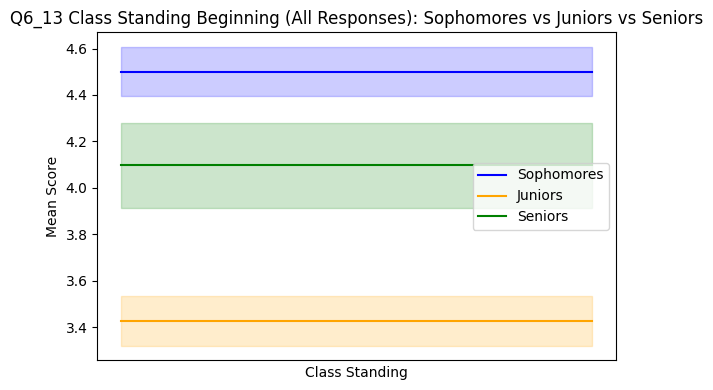

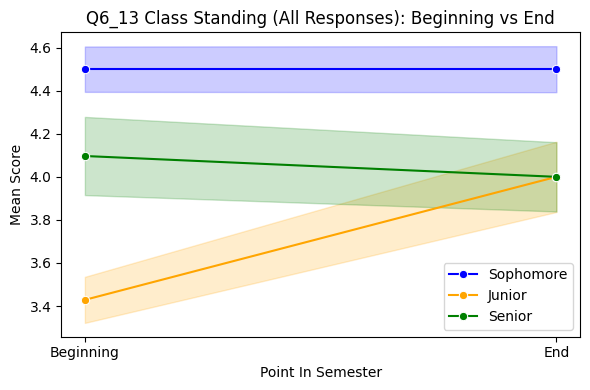

In [ ]:
# calculate means and standard deviations of Q6_13 and creates graphs
Q6_13_sophsAvg   = average_list(sophomore_beg_Q6_13.tolist())
Q6_13_jrsAvg   = average_list(junior_beg_Q6_13.tolist())
Q6_13_srsAvg   = average_list(senior_beg_Q6_13.tolist())

Q6_13_sophSTD = np.std(sophomore_beg_Q6_13.tolist())
Q6_13_jrSTD = np.std(junior_beg_Q6_13.tolist())
Q6_13_srSTD = np.std(senior_beg_Q6_13.tolist())


print(f"Q6_13: Soph Beginning Avg: {Q6_13_sophsAvg}")
print(f"Q6_13: Jr Beginning Avg: {Q6_13_jrsAvg}")
print(f"Q6_13: Sr Beginning Avg: {Q6_13_srsAvg}")

print(Q6_13_sophSTD)
print(Q6_13_jrSTD)
print(Q6_13_srSTD)

lineplot_class("Q6_13 Class Standing Beginning (All Responses)", sophs=sophomore_beg_Q6_13, jrs=junior_beg_Q6_13, srs=senior_beg_Q6_13, band_factor=0.2)

lineplot_beg_to_end_class("Q6_13 Class Standing (All Responses)", sophomore_beg_Q6_13, sophomore_end_Q6_13, junior_beg_Q6_13, junior_end_Q6_13, senior_beg_Q6_13, senior_end_Q6_13, band_factor=0.2)

In [ ]:
# Q6_14
# mean for Q6_14
Q6_14_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_14"].mean()
print("Q6_14 Mean", Q6_14_result, "\n")

# create dataframes for each class level
junior_beg_Q6_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()
senior_beg_Q6_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()
sophomore_beg_Q6_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_14"].dropna()

junior_end_Q6_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_14"].dropna()
senior_end_Q6_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_14"].dropna()
sophomore_end_Q6_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_14"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_14, senior_beg_Q6_14, sophomore_end_Q6_14)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_14, senior_end_Q6_14, sophomore_end_Q6_14)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_14, junior_end_Q6_14)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_14, senior_end_Q6_14)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_14, sophomore_end_Q6_14)

Q6_14 Mean Class Standing Label  B/E?     
Junior                Beginning    4.428571
                      End          4.142857
Senior                Beginning    4.129032
                      End          4.142857
Sophomore             Beginning    4.200000
                      End          4.250000
Name: Q6_14, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.0109864019714387
P-value: 0.6032079992708117
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.06865310610223617
P-value: 0.9662559192940263
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 27.5
P-value: 0.7195041960117442
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 530.0
P-value: 0.868570475049343
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 39.0
P-value: 0.96159869

In [ ]:
# Q6_15
# mean for Q6_15
Q6_15_result = data.groupby(["Class Standing Label", "B/E?"])["Q6_15"].mean()
print("Q6_15 Mean", Q6_15_result, "\n")

# create dataframes for each class level
junior_beg_Q6_15 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()
senior_beg_Q6_15 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()
sophomore_beg_Q6_15 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q6_15"].dropna()

junior_end_Q6_15 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q6_15"].dropna()
senior_end_Q6_15 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q6_15"].dropna()
sophomore_end_Q6_15 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q6_15"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q6_15, senior_beg_Q6_15, sophomore_end_Q6_15)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q6_15, senior_end_Q6_15, sophomore_end_Q6_15)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q6_15, junior_end_Q6_15)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q6_15, senior_end_Q6_15)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q6_15, sophomore_end_Q6_15)

Q6_15 Mean Class Standing Label  B/E?     
Junior                Beginning    2.142857
                      End          3.428571
Senior                Beginning    3.129032
                      End          3.285714
Sophomore             Beginning    2.300000
                      End          2.750000
Name: Q6_15, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.825518512508017
P-value: 0.08956781274889473
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.6697223542458564
P-value: 0.43393471731775424
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 5.0
P-value: 0.00864919604944753
Reject the null hypothesis: Significant differences exists

Seniors:
Mann-Whitney U-Value: 507.5
P-value: 0.6461766138708128
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 30.5
P-value: 0.4037871286328255
F

In [ ]:
# START OF QUESTION 5

In [ ]:
# Q5_1
# mean for Q5_1
Q5_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_1"].mean()
print("Q5_1 Mean", Q5_1_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()
senior_beg_Q5_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()
sophomore_beg_Q5_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_1"].dropna()

junior_end_Q5_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_1"].dropna()
senior_end_Q5_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_1"].dropna()
sophomore_end_Q5_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_1, senior_beg_Q5_1, sophomore_end_Q5_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_1, senior_end_Q5_1, sophomore_end_Q5_1)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_1, junior_end_Q5_1)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_1, senior_end_Q5_1)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_1, sophomore_end_Q5_1)

Q5_1 Mean Class Standing Label  B/E?     
Junior                Beginning    4.125000
                      End          4.333333
Senior                Beginning    4.468750
                      End          4.466667
Sophomore             Beginning    4.181818
                      End          4.571429
Name: Q5_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.0389433380377233
P-value: 0.594834734584563
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.24842105263158984
P-value: 0.8831938857543132
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 21.5
P-value: 0.7789468093234322
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 465.0
P-value: 0.8171728743182476
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 31.0
P-value: 0.4834301528

In [ ]:
# Q5_2
# mean for Q5_2
Q5_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_2"].mean()
print("Q5_2 Mean", Q5_2_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()
senior_beg_Q5_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()
sophomore_beg_Q5_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_2"].dropna()

junior_end_Q5_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_2"].dropna()
senior_end_Q5_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_2"].dropna()
sophomore_end_Q5_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_2, senior_beg_Q5_2, sophomore_end_Q5_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_2, senior_end_Q5_2, sophomore_end_Q5_2)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_2, junior_end_Q5_2)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_2, senior_end_Q5_2)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_2, sophomore_end_Q5_2)

Q5_2 Mean Class Standing Label  B/E?     
Junior                Beginning    4.375000
                      End          4.500000
Senior                Beginning    4.375000
                      End          4.200000
Sophomore             Beginning    4.090909
                      End          4.714286
Name: Q5_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.8166208791208525
P-value: 0.4032048878879744
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 3.184163059163033
P-value: 0.20350157601550983
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 21.0
P-value: 0.7167221169262206
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 534.0
P-value: 0.4087595462589322
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 23.0
P-value: 0.1331729661

In [ ]:
# Q5_3
# mean for Q5_3
Q5_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_3"].mean()
print("Q5_3 Mean", Q5_3_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()
senior_beg_Q5_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()
sophomore_beg_Q5_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_3"].dropna()

junior_end_Q5_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_3"].dropna()
senior_end_Q5_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_3"].dropna()
sophomore_end_Q5_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_3, senior_beg_Q5_3, sophomore_end_Q5_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_3, senior_end_Q5_3, sophomore_end_Q5_3)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_3, junior_end_Q5_3)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_3, senior_end_Q5_3)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_3, sophomore_end_Q5_3)

Q5_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.250000
                      End          3.833333
Senior                Beginning    4.290323
                      End          4.400000
Sophomore             Beginning    4.272727
                      End          4.714286
Name: Q5_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.1027739918124677
P-value: 0.34945272332784544
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 2.8160877341617323
P-value: 0.24462132727308403
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 29.5
P-value: 0.49062915431870335
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 419.5
P-value: 0.4750867712519826
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.5
P-value: 0.2790957

In [ ]:
# Q5_4
# mean for Q5_4
Q5_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_4"].mean()
print("Q5_4 Mean", Q5_4_result, "\n")

# create dataframes for each class level
junior_beg_Q5_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()
senior_beg_Q5_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()
sophomore_beg_Q5_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_4"].dropna()

junior_end_Q5_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_4"].dropna()
senior_end_Q5_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_4"].dropna()
sophomore_end_Q5_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_4, senior_beg_Q5_4, sophomore_end_Q5_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_4, senior_end_Q5_4, sophomore_end_Q5_4)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_4, junior_end_Q5_4)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_4, senior_end_Q5_4)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_4, sophomore_end_Q5_4)

Q5_4 Mean Class Standing Label  B/E?     
Junior                Beginning    4.250000
                      End          4.666667
Senior                Beginning    4.593750
                      End          4.482759
Sophomore             Beginning    4.181818
                      End          4.571429
Name: Q5_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.05951956044802
P-value: 0.5887463812165621
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.38475081750943213
P-value: 0.8249970992166102
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 18.0
P-value: 0.4247226704252338
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 503.5
P-value: 0.5147911192883321
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.0
P-value: 0.35895143585

In [ ]:
# Q5_5
# mean for Q5_5
Q5_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_5"].mean()
print("Q5_5 Mean", Q5_5_result, "\n")

# create dataframes for each class level
junior_beg_Q5_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()
senior_beg_Q5_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()
sophomore_beg_Q5_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_5"].dropna()

junior_end_Q5_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_5"].dropna()
senior_end_Q5_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_5"].dropna()
sophomore_end_Q5_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_5, senior_beg_Q5_5, sophomore_end_Q5_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_5, senior_end_Q5_5, sophomore_end_Q5_5)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_5, junior_end_Q5_5)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_5, senior_end_Q5_5)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_5, sophomore_end_Q5_5)

Q5_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.625000
                      End          4.500000
Senior                Beginning    4.531250
                      End          4.466667
Sophomore             Beginning    4.727273
                      End          4.857143
Name: Q5_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.233838348226279
P-value: 0.5396043063140834
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.7564805954279714
P-value: 0.4155134486947809
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 26.0
P-value: 0.8076935839899536
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 509.0
P-value: 0.6391882574147777
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 40.0
P-value: 0.86828522917

In [ ]:
# Q5_6
# mean for Q5_6
Q5_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_6"].mean()
print("Q5_6 Mean", Q5_6_result, "\n")

# create dataframes for each class level
junior_beg_Q5_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()
senior_beg_Q5_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()
sophomore_beg_Q5_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_6"].dropna()

junior_end_Q5_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_6"].dropna()
senior_end_Q5_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_6"].dropna()
sophomore_end_Q5_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_6, senior_beg_Q5_6, sophomore_end_Q5_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_6, senior_end_Q5_6, sophomore_end_Q5_6)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_6, junior_end_Q5_6)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_6, senior_end_Q5_6)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_6, sophomore_end_Q5_6)

Q5_6 Mean Class Standing Label  B/E?     
Junior                Beginning    3.625000
                      End          4.166667
Senior                Beginning    3.968750
                      End          4.266667
Sophomore             Beginning    4.000000
                      End          4.142857
Name: Q5_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.8735140074398542
P-value: 0.6461284191384351
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.20769230769230373
P-value: 0.9013639581328987
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 17.0
P-value: 0.37552998950964234
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 386.0
P-value: 0.1560328120710881
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 36.5
P-value: 0.87987590

In [ ]:
# Q5_7
# mean for Q5_7
Q5_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_7"].mean()
print("Q5_7 Mean", Q5_7_result, "\n")

# create dataframes for each class level
junior_beg_Q5_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()
senior_beg_Q5_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()
sophomore_beg_Q5_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_7"].dropna()

junior_end_Q5_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_7"].dropna()
senior_end_Q5_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_7"].dropna()
sophomore_end_Q5_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_7, senior_beg_Q5_7, sophomore_end_Q5_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_7, senior_end_Q5_7, sophomore_end_Q5_7)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_7, junior_end_Q5_7)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_7, senior_end_Q5_7)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_7, sophomore_end_Q5_7)

Q5_7 Mean Class Standing Label  B/E?     
Junior                Beginning    4.375000
                      End          4.666667
Senior                Beginning    4.531250
                      End          4.633333
Sophomore             Beginning    4.272727
                      End          4.571429
Name: Q5_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.296370869776451
P-value: 0.8622712049515479
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.25393953017872034
P-value: 0.8807603019036108
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.0
P-value: 0.5083315735521454
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 423.5
P-value: 0.35176605084604007
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.5
P-value: 0.575062130

In [ ]:
# Q5_8
# mean for Q5_8
Q5_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_8"].mean()
print("Q5_8 Mean", Q5_8_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()
senior_beg_Q5_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()
sophomore_beg_Q5_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_8"].dropna()

junior_end_Q5_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_8"].dropna()
senior_end_Q5_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_8"].dropna()
sophomore_end_Q5_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_8, senior_beg_Q5_8, sophomore_end_Q5_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_8, senior_end_Q5_8, sophomore_end_Q5_8)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_8, junior_end_Q5_8)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_8, senior_end_Q5_8)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_8, sophomore_end_Q5_8)

Q5_8 Mean Class Standing Label  B/E?     
Junior                Beginning    4.125000
                      End          4.500000
Senior                Beginning    4.406250
                      End          4.266667
Sophomore             Beginning    4.272727
                      End          4.714286
Name: Q5_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.1774048815506077
P-value: 0.3366530376792175
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 2.3773647405226264
P-value: 0.30462237925399605
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.5
P-value: 0.5637028616507731
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 522.5
P-value: 0.5145928971366664
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.5
P-value: 0.279095788

In [ ]:
# Q5_9
# mean for Q5_9
Q5_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_9"].mean()
print("Q5_9 Mean", Q5_9_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()
senior_beg_Q5_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()
sophomore_beg_Q5_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_9"].dropna()

junior_end_Q5_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_9"].dropna()
senior_end_Q5_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_9"].dropna()
sophomore_end_Q5_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_9, senior_beg_Q5_9, sophomore_end_Q5_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_9, senior_end_Q5_9, sophomore_end_Q5_9)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_9, junior_end_Q5_9)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_9, senior_end_Q5_9)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_9, sophomore_end_Q5_9)

Q5_9 Mean Class Standing Label  B/E?     
Junior                Beginning    4.625000
                      End          4.500000
Senior                Beginning    4.612903
                      End          4.566667
Sophomore             Beginning    4.545455
                      End          4.714286
Name: Q5_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.23698561336021046
P-value: 0.8882582051592424
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.552754415475219
P-value: 0.758526754629679
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 28.5
P-value: 0.5411928987419992
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 476.0
P-value: 0.8571864443893242
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 38.0
P-value: 1.0
Fail to r

In [ ]:
# Q5_10
# mean for Q5_10
Q5_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_10"].mean()
print("Q5_10 Mean", Q5_10_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()
senior_beg_Q5_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()
sophomore_beg_Q5_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_10"].dropna()

junior_end_Q5_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_10"].dropna()
senior_end_Q5_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_10"].dropna()
sophomore_end_Q5_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_10, senior_beg_Q5_10, sophomore_end_Q5_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_10, senior_end_Q5_10, sophomore_end_Q5_10)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_10, junior_end_Q5_10)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_10, senior_end_Q5_10)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_10, sophomore_end_Q5_10)

Q5_10 Mean Class Standing Label  B/E?     
Junior                Beginning    3.875000
                      End          4.166667
Senior                Beginning    4.218750
                      End          4.300000
Sophomore             Beginning    4.000000
                      End          4.142857
Name: Q5_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.8124940237138917
P-value: 0.6661456012388651
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.19419703103912295
P-value: 0.9074666021857078
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 20.5
P-value: 0.6749188570622133
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 454.0
P-value: 0.6965853221112766
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 34.5
P-value: 0.7357742

In [ ]:
# Q5_11
# mean for Q5_11
Q5_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_11"].mean()
print("Q5_11 Mean", Q5_11_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()
senior_beg_Q5_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()
sophomore_beg_Q5_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_11"].dropna()

junior_end_Q5_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_11"].dropna()
senior_end_Q5_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_11"].dropna()
sophomore_end_Q5_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_11, senior_beg_Q5_11, sophomore_end_Q5_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_11, senior_end_Q5_11, sophomore_end_Q5_11)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_11, junior_end_Q5_11)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_11, senior_end_Q5_11)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_11, sophomore_end_Q5_11)

Q5_11 Mean Class Standing Label  B/E?     
Junior                Beginning    3.750000
                      End          4.500000
Senior                Beginning    4.406250
                      End          4.400000
Sophomore             Beginning    3.818182
                      End          4.285714
Name: Q5_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.4951768608317932
P-value: 0.17419351711918712
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.7252863769762116
P-value: 0.6958346710304557
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 13.5
P-value: 0.1680128764428085
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 468.5
P-value: 0.8628225135496097
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.0
P-value: 0.2536412

In [ ]:
# Q5_12
# mean for Q5_12
Q5_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_12"].mean()
print("Q5_12 Mean", Q5_12_result, "\n")

# create dataframes for each class level
junior_beg_Q5_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()
senior_beg_Q5_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()
sophomore_beg_Q5_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_12"].dropna()

junior_end_Q5_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_12"].dropna()
senior_end_Q5_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_12"].dropna()
sophomore_end_Q5_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_12, senior_beg_Q5_12, sophomore_end_Q5_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_12, senior_end_Q5_12, sophomore_end_Q5_12)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_12, junior_end_Q5_12)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_12, senior_end_Q5_12)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_12, sophomore_end_Q5_12)

Q5_12 Mean Class Standing Label  B/E?     
Junior                Beginning    4.250000
                      End          4.500000
Senior                Beginning    4.406250
                      End          4.433333
Sophomore             Beginning    4.181818
                      End          4.714286
Name: Q5_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.3152179995002884
P-value: 0.5180886047288864
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.8114942528735528
P-value: 0.6664786809565458
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 22.5
P-value: 0.8852339144732015
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 460.5
P-value: 0.7652407534703085
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 26.5
P-value: 0.24234885

In [ ]:
# Q5_13
# mean for Q5_13
Q5_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q5_13"].mean()
print("Q5_13 Mean", Q5_13_result, "\n")

# creates dataframes for each class level
junior_beg_Q5_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()
senior_beg_Q5_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()
sophomore_beg_Q5_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q5_13"].dropna()

junior_end_Q5_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q5_13"].dropna()
senior_end_Q5_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q5_13"].dropna()
sophomore_end_Q5_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q5_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q5_13, senior_beg_Q5_13, sophomore_end_Q5_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q5_13, senior_end_Q5_13, sophomore_end_Q5_13)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q5_13, junior_end_Q5_13)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q5_13, senior_end_Q5_13)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q5_13, sophomore_end_Q5_13)

Q5_13 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.666667
Senior                Beginning    4.406250
                      End          4.466667
Sophomore             Beginning    4.272727
                      End          4.571429
Name: Q5_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.726401049801757
P-value: 0.25584064087888075
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.3632142857142534
P-value: 0.8339288909927055
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 12.0
P-value: 0.10607746368097136
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 459.5
P-value: 0.7520324589921266
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.5
P-value: 0.5750621

In [ ]:
# START OF QUESTION 4

In [ ]:
# Q4_1
# mean for Q4_1
Q4_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_1"].mean()
print("Q4_1 Mean", Q4_1_result, "\n")

# create dataframes for each class level
junior_beg_Q4_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()
senior_beg_Q4_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()
sophomore_beg_Q4_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_1"].dropna()

junior_end_Q4_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_1"].dropna()
senior_end_Q4_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_1"].dropna()
sophomore_end_Q4_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_1, senior_beg_Q4_1, sophomore_end_Q4_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_1, senior_end_Q4_1, sophomore_end_Q4_1)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_1, junior_end_Q4_1)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_1, senior_end_Q4_1)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_1, sophomore_end_Q4_1)

Q4_1 Mean Class Standing Label  B/E?     
Junior                Beginning    3.555556
                      End          3.714286
Senior                Beginning    3.941176
                      End          4.111111
Sophomore             Beginning    3.900000
                      End          4.250000
Name: Q4_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.3289167703656974
P-value: 0.18929315419984133
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.0663658986123294
P-value: 0.5867344483649839
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 28.0
P-value: 0.7353166906373405
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 555.0
P-value: 0.4826995381823329
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.0
P-value: 0.284073099

In [ ]:
# Q4_2
# mean for Q4_2
Q4_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_2"].mean()
print("Q4_2 Mean", Q4_2_result, "\n")

# create dataframes for each class level
junior_beg_Q4_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()
senior_beg_Q4_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()
sophomore_beg_Q4_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_2"].dropna()

junior_end_Q4_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_2"].dropna()
senior_end_Q4_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_2"].dropna()
sophomore_end_Q4_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_2, senior_beg_Q4_2, sophomore_end_Q4_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_2, senior_end_Q4_2, sophomore_end_Q4_2)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_2, junior_end_Q4_2)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_2, senior_end_Q4_2)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_2, sophomore_end_Q4_2)

Q4_2 Mean Class Standing Label  B/E?     
Junior                Beginning    3.888889
                      End          3.714286
Senior                Beginning    3.794118
                      End          3.944444
Sophomore             Beginning    3.900000
                      End          3.625000
Name: Q4_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.34038459732557275
P-value: 0.8435025965781585
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.8937872332194948
P-value: 0.6396119487431022
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 33.5
P-value: 0.8637324884856541
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 568.0
P-value: 0.5915445828246101
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 45.5
P-value: 0.638785467

In [ ]:
# Q4_3
# mean for Q4_3
Q4_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_3"].mean()
print("Q4_3 Mean", Q4_3_result, "\n")

# create dataframes for each class level
junior_beg_Q4_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()
senior_beg_Q4_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()
sophomore_beg_Q4_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_3"].dropna()

junior_end_Q4_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_3"].dropna()
senior_end_Q4_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_3"].dropna()
sophomore_end_Q4_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_3, senior_beg_Q4_3, sophomore_end_Q4_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_3, senior_end_Q4_3, sophomore_end_Q4_3)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_3, junior_end_Q4_3)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_3, senior_end_Q4_3)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_3, sophomore_end_Q4_3)

Q4_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.111111
                      End          3.857143
Senior                Beginning    3.941176
                      End          4.083333
Sophomore             Beginning    3.900000
                      End          4.250000
Name: Q4_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.6866023884255601
P-value: 0.709424504822951
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.036830530688406
P-value: 0.5954634522153304
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 37.5
P-value: 0.527020952396827
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 565.0
P-value: 0.5640359142254243
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.5
P-value: 0.3338086186208

In [ ]:
# Q4_4
# mean for Q4_4
Q4_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_4"].mean()
print("Q4_4 Mean", Q4_4_result, "\n")

# create dataframes for each class level
junior_beg_Q4_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()
senior_beg_Q4_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()
sophomore_beg_Q4_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_4"].dropna()

junior_end_Q4_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_4"].dropna()
senior_end_Q4_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_4"].dropna()
sophomore_end_Q4_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_4, senior_beg_Q4_4, sophomore_end_Q4_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_4, senior_end_Q4_4, sophomore_end_Q4_4)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_4, junior_end_Q4_4)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_4, senior_end_Q4_4)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_4, sophomore_end_Q4_4)

Q4_4 Mean Class Standing Label  B/E?     
Junior                Beginning    3.777778
                      End          4.428571
Senior                Beginning    4.088235
                      End          4.055556
Sophomore             Beginning    3.900000
                      End          4.125000
Name: Q4_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.2413222045575079
P-value: 0.5375889188312185
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.147695491985199
P-value: 0.5633536214391539
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 17.0
P-value: 0.11283710398665896
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 623.5
P-value: 0.8905593421990143
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 33.5
P-value: 0.5680731604

In [ ]:
# Q4_5
# mean for Q4_5
Q4_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_5"].mean()
print("Q4_5 Mean", Q4_5_result, "\n")

# create dataframes for each class level
junior_beg_Q4_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()
senior_beg_Q4_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()
sophomore_beg_Q4_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_5"].dropna()

junior_end_Q4_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_5"].dropna()
senior_end_Q4_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_5"].dropna()
sophomore_end_Q4_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_5, senior_beg_Q4_5, sophomore_end_Q4_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_5, senior_end_Q4_5, sophomore_end_Q4_5)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_5, junior_end_Q4_5)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_5, senior_end_Q4_5)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_5, sophomore_end_Q4_5)

Q4_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          3.571429
Senior                Beginning    3.970588
                      End          4.138889
Sophomore             Beginning    3.666667
                      End          4.250000
Name: Q4_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.6642302907844062
P-value: 0.7174047122514589
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 2.550471853186394
P-value: 0.27936505080118307
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 39.5
P-value: 0.39082392361587426
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 542.5
P-value: 0.38810787370355004
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 19.5
P-value: 0.08141349

In [ ]:
# Q4_6
# mean for Q4_6
Q4_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_6"].mean()
print("Q4_6 Mean", Q4_6_result, "\n")

# create dataframes for each class level
junior_beg_Q4_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()
senior_beg_Q4_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()
sophomore_beg_Q4_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_6"].dropna()

junior_end_Q4_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_6"].dropna()
senior_end_Q4_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_6"].dropna()
sophomore_end_Q4_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_6, senior_beg_Q4_6, sophomore_end_Q4_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_6, senior_end_Q4_6, sophomore_end_Q4_6)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_6, junior_end_Q4_6)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_6, senior_end_Q4_6)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_6, sophomore_end_Q4_6)

Q4_6 Mean Class Standing Label  B/E?     
Junior                Beginning    3.666667
                      End          3.714286
Senior                Beginning    3.647059
                      End          4.000000
Sophomore             Beginning    3.600000
                      End          4.000000
Name: Q4_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.8771852114339987
P-value: 0.6449434723999159
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.42622598709916587
P-value: 0.8080648259448165
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 30.0
P-value: 0.9107219256199297
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 500.0
P-value: 0.16945274204330674
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.0
P-value: 0.25107107

In [ ]:
# Q4_7
# mean for Q4_7
Q4_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_7"].mean()
print("Q4_7 Mean", Q4_7_result, "\n")

# create dataframes for each class level
junior_beg_Q4_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()
senior_beg_Q4_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()
sophomore_beg_Q4_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_7"].dropna()

junior_end_Q4_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_7"].dropna()
senior_end_Q4_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_7"].dropna()
sophomore_end_Q4_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_7, senior_beg_Q4_7, sophomore_end_Q4_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_7, senior_end_Q4_7, sophomore_end_Q4_7)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_7, junior_end_Q4_7)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_7, senior_end_Q4_7)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_7, sophomore_end_Q4_7)

Q4_7 Mean Class Standing Label  B/E?     
Junior                Beginning    3.555556
                      End          3.857143
Senior                Beginning    3.911765
                      End          4.166667
Sophomore             Beginning    3.700000
                      End          4.125000
Name: Q4_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.5088884698141818
P-value: 0.4702719028241774
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.301778116639012
P-value: 0.5215818538778312
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 25.0
P-value: 0.5010949421523454
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 545.0
P-value: 0.4076147812638462
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 34.5
P-value: 0.63993933915

In [ ]:
# Q4_8
# mean for Q4_8
Q4_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_8"].mean()
print("Q4_8 Mean", Q4_8_result, "\n")

# create dataframes for each class level
junior_beg_Q4_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()
senior_beg_Q4_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()
sophomore_beg_Q4_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_8"].dropna()

junior_end_Q4_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_8"].dropna()
senior_end_Q4_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_8"].dropna()
sophomore_end_Q4_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_8, senior_beg_Q4_8, sophomore_end_Q4_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_8, senior_end_Q4_8, sophomore_end_Q4_8)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_8, junior_end_Q4_8)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_8, senior_end_Q4_8)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_8, sophomore_end_Q4_8)

Q4_8 Mean Class Standing Label  B/E?     
Junior                Beginning    4.111111
                      End          4.142857
Senior                Beginning    4.088235
                      End          4.250000
Sophomore             Beginning    4.200000
                      End          4.250000
Name: Q4_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.1331040480708354
P-value: 0.9356142401618213
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.21306818181819392
P-value: 0.8989444018069681
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 30.5
P-value: 0.9509801863003505
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 567.0
P-value: 0.5741217156766238
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 39.0
P-value: 0.957167318

In [ ]:
# Q4_9
# mean for Q4_9
Q4_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_9"].mean()
print("Q4_9 Mean", Q4_9_result, "\n")

# create dataframes for each class level
junior_beg_Q4_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()
senior_beg_Q4_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()
sophomore_beg_Q4_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_9"].dropna()

junior_end_Q4_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_9"].dropna()
senior_end_Q4_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_9"].dropna()
sophomore_end_Q4_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_9, senior_beg_Q4_9, sophomore_end_Q4_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_9, senior_end_Q4_9, sophomore_end_Q4_9)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_9, junior_end_Q4_9)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_9, senior_end_Q4_9)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_9, sophomore_end_Q4_9)

Q4_9 Mean Class Standing Label  B/E?     
Junior                Beginning    3.666667
                      End          3.714286
Senior                Beginning    3.852941
                      End          4.055556
Sophomore             Beginning    3.800000
                      End          4.250000
Name: Q4_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.9359345790152113
P-value: 0.6262740090537202
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.868904570900672
P-value: 0.39280094941897264
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 33.0
P-value: 0.9122235958007606
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 560.5
P-value: 0.5228562225470417
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 26.0
P-value: 0.1823542474

In [ ]:
# Q4_10
# mean for Q4_10
Q4_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_10"].mean()
print("Q4_10 Mean", Q4_10_result, "\n")

# create dataframes for each class level
junior_beg_Q4_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()
senior_beg_Q4_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()
sophomore_beg_Q4_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_10"].dropna()

junior_end_Q4_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_10"].dropna()
senior_end_Q4_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_10"].dropna()
sophomore_end_Q4_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_10, senior_beg_Q4_10, sophomore_end_Q4_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_10, senior_end_Q4_10, sophomore_end_Q4_10)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_10, junior_end_Q4_10)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_10, senior_end_Q4_10)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_10, sophomore_end_Q4_10)

Q4_10 Mean Class Standing Label  B/E?     
Junior                Beginning    4.111111
                      End          4.285714
Senior                Beginning    4.382353
                      End          4.305556
Sophomore             Beginning    4.100000
                      End          4.375000
Name: Q4_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.5662511881314225
P-value: 0.456975457027213
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.11154605520367726
P-value: 0.9457537715328865
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 27.0
P-value: 0.6027290369331977
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 642.0
P-value: 0.7038167503676613
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 29.0
P-value: 0.19579874

In [ ]:
# Q4_11
# mean for Q4_11
Q4_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_11"].mean()
print("Q4_11 Mean", Q4_11_result, "\n")

# create dataframes for each class level
junior_beg_Q4_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()
senior_beg_Q4_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()
sophomore_beg_Q4_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_11"].dropna()

junior_end_Q4_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_11"].dropna()
senior_end_Q4_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_11"].dropna()
sophomore_end_Q4_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_11, senior_beg_Q4_11, sophomore_end_Q4_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_11, senior_end_Q4_11, sophomore_end_Q4_11)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_11, junior_end_Q4_11)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_11, senior_end_Q4_11)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_11, sophomore_end_Q4_11)

Q4_11 Mean Class Standing Label  B/E?     
Junior                Beginning    4.222222
                      End          4.428571
Senior                Beginning    4.294118
                      End          4.277778
Sophomore             Beginning    4.300000
                      End          4.250000
Name: Q4_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.4576356089881322
P-value: 0.7954734519909872
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.09853829298275885
P-value: 0.9519248879731164
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 26.5
P-value: 0.587746352368953
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 647.5
P-value: 0.6525346998658992
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 39.0
P-value: 0.96080745

In [ ]:
# Q4_12
# mean for Q4_12
Q4_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_12"].mean()
print("Q4_12 Mean", Q4_12_result, "\n")

# create dataframes for each class level
junior_beg_Q4_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()
senior_beg_Q4_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()
sophomore_beg_Q4_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_12"].dropna()

junior_end_Q4_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_12"].dropna()
senior_end_Q4_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_12"].dropna()
sophomore_end_Q4_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_12, senior_beg_Q4_12, sophomore_end_Q4_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_12, senior_end_Q4_12, sophomore_end_Q4_12)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_12, junior_end_Q4_12)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_12, senior_end_Q4_12)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_12, sophomore_end_Q4_12)

Q4_12 Mean Class Standing Label  B/E?     
Junior                Beginning    3.888889
                      End          3.857143
Senior                Beginning    3.705882
                      End          4.138889
Sophomore             Beginning    3.800000
                      End          4.125000
Name: Q4_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.7836582702834136
P-value: 0.6758195779123911
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.9347836356764944
P-value: 0.6266345157239248
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 33.5
P-value: 0.8662133726349169
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 487.0
P-value: 0.12257205308755006
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.0
P-value: 0.4256441

In [ ]:
# Q4_13
# mean for Q4_13
Q4_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_13"].mean()
print("Q4_13 Mean", Q4_13_result, "\n")

# create dataframes for each class level
junior_beg_Q4_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()
senior_beg_Q4_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()
sophomore_beg_Q4_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_13"].dropna()

junior_end_Q4_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_13"].dropna()
senior_end_Q4_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_13"].dropna()
sophomore_end_Q4_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_13, senior_beg_Q4_13, sophomore_end_Q4_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_13, senior_end_Q4_13, sophomore_end_Q4_13)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_13, junior_end_Q4_13)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_13, senior_end_Q4_13)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_13, sophomore_end_Q4_13)

Q4_13 Mean Class Standing Label  B/E?     
Junior                Beginning    3.555556
                      End          3.714286
Senior                Beginning    3.617647
                      End          4.027778
Sophomore             Beginning    3.700000
                      End          3.875000
Name: Q4_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.4231137641671428
P-value: 0.8093232437510021
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.645959550062654
P-value: 0.7239884968645114
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 28.5
P-value: 0.7816749139007505
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 486.5
P-value: 0.12266982573604097
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 35.5
P-value: 0.70010405

In [ ]:
# Q4_14
# mean for Q4_14
Q4_14_result = data.groupby(["Class Standing Label", "B/E?"])["Q4_14"].mean()
print("Q4_14 Mean", Q4_14_result, "\n")

# create dataframes for each class level
junior_beg_Q4_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()
senior_beg_Q4_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()
sophomore_beg_Q4_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q4_14"].dropna()

junior_end_Q4_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q4_14"].dropna()
senior_end_Q4_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q4_14"].dropna()
sophomore_end_Q4_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q4_14"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q4_14, senior_beg_Q4_14, sophomore_end_Q4_14)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q4_14, senior_end_Q4_14, sophomore_end_Q4_14)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q4_14, junior_end_Q4_14)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q4_14, senior_end_Q4_14)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q4_14, sophomore_end_Q4_14)

Q4_14 Mean Class Standing Label  B/E?     
Junior                Beginning    4.111111
                      End          4.142857
Senior                Beginning    3.941176
                      End          3.916667
Sophomore             Beginning    4.100000
                      End          4.000000
Name: Q4_14, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.0401160623771127
P-value: 0.9801417928631578
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.1471210142964046
P-value: 0.9290799281138487
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 30.5
P-value: 0.9509801863003505
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 622.0
P-value: 0.9064618615136228
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 42.0
P-value: 0.88717021

In [ ]:
# START OF QUESTION 25

In [ ]:
# Q25_1
# mean for Q25_1
Q25_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_1"].mean()
print("Q25_1 Mean", Q25_1_result, "\n")

# create dataframes for each class level
junior_beg_Q25_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()
senior_beg_Q25_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()
sophomore_beg_Q25_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_1"].dropna()

junior_end_Q25_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_1"].dropna()
senior_end_Q25_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_1"].dropna()
sophomore_end_Q25_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_1, senior_beg_Q25_1, sophomore_end_Q25_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_1, senior_end_Q25_1, sophomore_end_Q25_1)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_1, junior_end_Q25_1)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_1, senior_end_Q25_1)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_1, sophomore_end_Q25_1)

Q25_1 Mean Class Standing Label  B/E?     
Junior                Beginning    1.750000
                      End          1.800000
Senior                Beginning    1.742857
                      End          2.033333
Sophomore             Beginning    2.888889
                      End          3.142857
Name: Q25_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 10.074611653288667
P-value: 0.006491213234711883
Reject the null hypothesis: Significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 6.79358566455879
P-value: 0.033480475455583504
Reject the null hypothesis: Significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 436.5
P-value: 0.19965820529815925
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 27.5
P-value: 0.6801064116731121
Fail to reject the null h

Q25_1: Soph Beginning Avg: 2.888888888888889
Q25_1: Jr Beginning Avg: 1.75
Q25_1: Sr Beginning Avg: 1.7428571428571429
0.8748897637790901
1.0897247358851685
1.1549361675090135


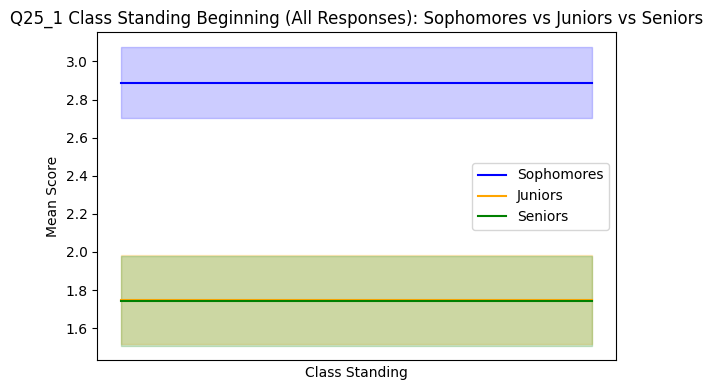

In [ ]:
# calculate average and standard deviation of Q25_1 and graphs beginning
Q25_1_sophsAvg   = average_list(sophomore_beg_Q25_1.tolist())
Q25_1_jrsAvg   = average_list(junior_beg_Q25_1.tolist())
Q25_1_srsAvg   = average_list(senior_beg_Q25_1.tolist())

Q4_6_sophSTD = np.std(sophomore_beg_Q25_1.tolist())
Q4_6_jrSTD = np.std(junior_beg_Q25_1.tolist())
Q4_6_srSTD = np.std(senior_beg_Q25_1.tolist())


print(f"Q25_1: Soph Beginning Avg: {Q25_1_sophsAvg}")
print(f"Q25_1: Jr Beginning Avg: {Q25_1_jrsAvg}")
print(f"Q25_1: Sr Beginning Avg: {Q25_1_srsAvg}")

print(Q4_6_sophSTD)
print(Q4_6_jrSTD)
print(Q4_6_srSTD)
lineplot_class("Q25_1 Class Standing Beginning (All Responses)", sophs=sophomore_beg_Q25_1, jrs=junior_beg_Q25_1, srs=senior_beg_Q25_1, band_factor=0.2)

Q25_1: Soph End Avg: 3.142857142857143
Q25_1: Jr End Avg: 1.8
Q25_1: Sr End Avg: 2.033333333333333
0.6388765649999398
0.9797958971132713
1.1100550536897809


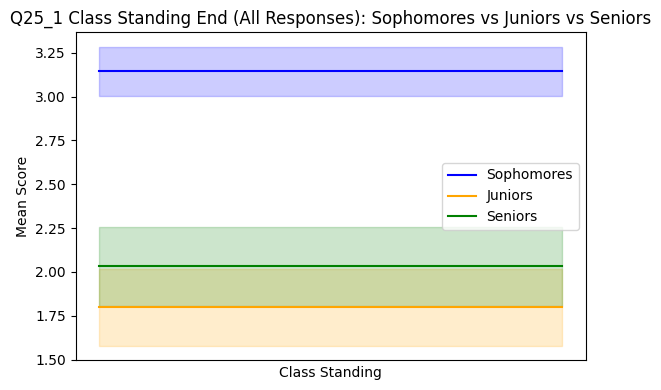

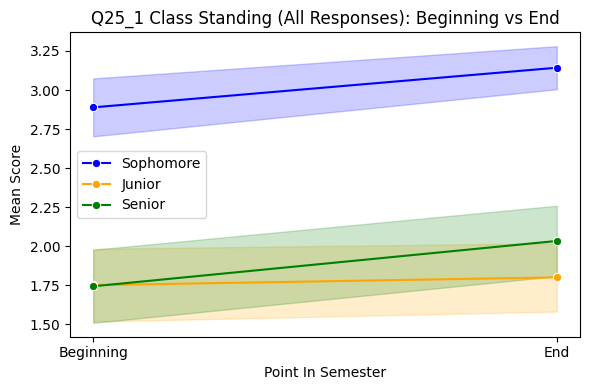

In [ ]:
# graphs and calculates average and standard deviation of Q25_1 end
Q25_1_sophsAvg   = average_list(sophomore_end_Q25_1.tolist())
Q25_1_jrsAvg   = average_list(junior_end_Q25_1.tolist())
Q25_1_srsAvg   = average_list(senior_end_Q25_1.tolist())

Q25_1_sophSTD = np.std(sophomore_end_Q25_1.tolist())
Q25_1_jrSTD = np.std(junior_end_Q25_1.tolist())
Q25_1_srSTD = np.std(senior_end_Q25_1.tolist())


print(f"Q25_1: Soph End Avg: {Q25_1_sophsAvg}")
print(f"Q25_1: Jr End Avg: {Q25_1_jrsAvg}")
print(f"Q25_1: Sr End Avg: {Q25_1_srsAvg}")

print(Q25_1_sophSTD)
print(Q25_1_jrSTD)
print(Q25_1_srSTD)

lineplot_class("Q25_1 Class Standing End (All Responses)", sophs=sophomore_end_Q25_1, jrs=junior_end_Q25_1, srs=senior_end_Q25_1, band_factor=0.2)
lineplot_beg_to_end_class("Q25_1 Class Standing (All Responses)", sophomore_beg_Q25_1, sophomore_end_Q25_1, junior_beg_Q25_1, junior_end_Q25_1, senior_beg_Q25_1, senior_end_Q25_1, band_factor=0.2)


In [ ]:
# Q25_2
# mean for Q25_2
Q25_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_2"].mean()
print("Q25_2 Mean", Q25_2_result, "\n")

# create dataframes for each class level
junior_beg_Q25_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()
senior_beg_Q25_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()
sophomore_beg_Q25_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_2"].dropna()

junior_end_Q25_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_2"].dropna()
senior_end_Q25_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_2"].dropna()
sophomore_end_Q25_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_2, senior_beg_Q25_2, sophomore_end_Q25_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_2, senior_end_Q25_2, sophomore_end_Q25_2)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_2, junior_end_Q25_2)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_2, senior_end_Q25_2)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_2, sophomore_end_Q25_2)

Q25_2 Mean Class Standing Label  B/E?     
Junior                Beginning    3.000000
                      End          2.000000
Senior                Beginning    2.885714
                      End          3.233333
Sophomore             Beginning    3.000000
                      End          3.375000
Name: Q25_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.4364467041172078
P-value: 0.4876178120200132
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 6.131699126930831
P-value: 0.046614223296529145
Reject the null hypothesis: Significant differences exists 

Juniors:
Mann-Whitney U-Value: 31.0
P-value: 0.10274663909213978
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 441.5
P-value: 0.2530736829144077
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 25.5
P-value: 0.29641189021080827

Q25_2: Soph End Avg: 3.375
Q25_2: Jr End Avg: 2.0
Q25_2: Sr End Avg: 3.2333333333333334
0.6959705453537527
0.8944271909999159
0.9195409482755815


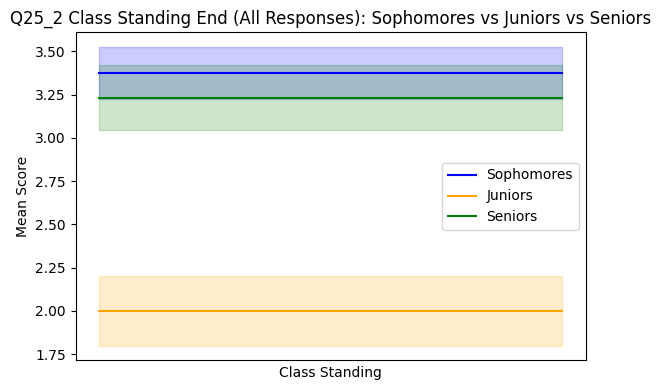

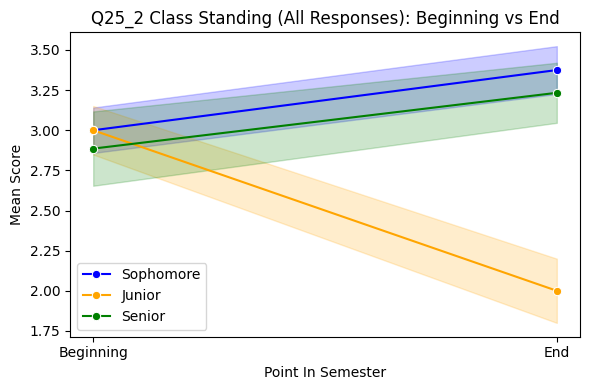

In [ ]:
# graphs and calculates standard deviation and average of Q25_2
Q25_2_sophsAvg   = average_list(sophomore_end_Q25_2.tolist())
Q25_2_jrsAvg   = average_list(junior_end_Q25_2.tolist())
Q25_2_srsAvg   = average_list(senior_end_Q25_2.tolist())

Q4_6_sophSTD = np.std(sophomore_end_Q25_2.tolist())
Q4_6_jrSTD = np.std(junior_end_Q25_2.tolist())
Q4_6_srSTD = np.std(senior_end_Q25_2.tolist())


print(f"Q25_2: Soph End Avg: {Q25_2_sophsAvg}")
print(f"Q25_2: Jr End Avg: {Q25_2_jrsAvg}")
print(f"Q25_2: Sr End Avg: {Q25_2_srsAvg}")

print(Q4_6_sophSTD)
print(Q4_6_jrSTD)
print(Q4_6_srSTD)
lineplot_class("Q25_2 Class Standing End (All Responses)", sophs=sophomore_end_Q25_2, jrs=junior_end_Q25_2, srs=senior_end_Q25_2, band_factor=0.2)
lineplot_beg_to_end_class("Q25_2 Class Standing (All Responses)", sophomore_beg_Q25_2, sophomore_end_Q25_2, junior_beg_Q25_2, junior_end_Q25_2, senior_beg_Q25_2, senior_end_Q25_2, band_factor=0.2)


In [ ]:
# Q25_3
# mean for Q25_3
Q25_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_3"].mean()
print("Q25_3 Mean", Q25_3_result, "\n")

# create dataframes for each class level
junior_beg_Q25_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()
senior_beg_Q25_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()
sophomore_beg_Q25_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_3"].dropna()

junior_end_Q25_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_3"].dropna()
senior_end_Q25_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_3"].dropna()
sophomore_end_Q25_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_3, senior_beg_Q25_3, sophomore_end_Q25_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_3, senior_end_Q25_3, sophomore_end_Q25_3)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_3, junior_end_Q25_3)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_3, senior_end_Q25_3)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_3, sophomore_end_Q25_3)

Q25_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          3.800000
Senior                Beginning    3.828571
                      End          4.066667
Sophomore             Beginning    4.111111
                      End          4.375000
Name: Q25_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.406344931788681
P-value: 0.11045219612366645
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 2.93341779279281
P-value: 0.23068344034992422
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 23.5
P-value: 0.5515512682153323
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 427.0
P-value: 0.15606926343164354
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.0
P-value: 0.39035136

In [ ]:
# Q25_4
# mean for Q25_4
Q25_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_4"].mean()
print("Q25_4 Mean", Q25_4_result, "\n")

# create dataframes for each class level
junior_beg_Q25_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()
senior_beg_Q25_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()
sophomore_beg_Q25_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_4"].dropna()

junior_end_Q25_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_4"].dropna()
senior_end_Q25_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_4"].dropna()
sophomore_end_Q25_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_4, senior_beg_Q25_4, sophomore_end_Q25_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_4, senior_end_Q25_4, sophomore_end_Q25_4)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_4, junior_end_Q25_4)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_4, senior_end_Q25_4)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_4, sophomore_end_Q25_4)

Q25_4 Mean Class Standing Label  B/E?     
Junior                Beginning    3.625000
                      End          3.600000
Senior                Beginning    4.142857
                      End          4.100000
Sophomore             Beginning    3.888889
                      End          3.750000
Name: Q25_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.9461394530379494
P-value: 0.13902941819983353
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 3.6970554272517084
P-value: 0.15746883495054156
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 549.0
P-value: 0.7234333663442452
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 39.5
P-value: 0.7454124862081434
Fail

In [ ]:
# Q25_5
# mean for Q25_5
Q25_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_5"].mean()
print("Q25_5 Mean", Q25_5_result, "\n")

# create dataframes for each class level
junior_beg_Q25_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()
senior_beg_Q25_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()
sophomore_beg_Q25_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_5"].dropna()

junior_end_Q25_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_5"].dropna()
senior_end_Q25_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_5"].dropna()
sophomore_end_Q25_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_5, senior_beg_Q25_5, sophomore_end_Q25_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_5, senior_end_Q25_5, sophomore_end_Q25_5)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_5, junior_end_Q25_5)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_5, senior_end_Q25_5)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_5, sophomore_end_Q25_5)

Q25_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.125000
                      End          4.000000
Senior                Beginning    4.085714
                      End          4.033333
Sophomore             Beginning    4.111111
                      End          4.000000
Name: Q25_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.21175136721357557
P-value: 0.8995364682545356
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.1311949685534287
P-value: 0.9365077475291752
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 19.0
P-value: 0.9355273088570053
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 553.0
P-value: 0.6910993441988624
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 39.0
P-value: 0.7642444

In [ ]:
# Q25_6
# mean for Q25_6
Q25_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_6"].mean()
print("Q25_6 Mean", Q25_6_result, "\n")

# create dataframes for each class level
junior_beg_Q25_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()
senior_beg_Q25_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()
sophomore_beg_Q25_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_6"].dropna()

junior_end_Q25_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_6"].dropna()
senior_end_Q25_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_6"].dropna()
sophomore_end_Q25_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_6, senior_beg_Q25_6, sophomore_end_Q25_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_6, senior_end_Q25_6, sophomore_end_Q25_6)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_6, junior_end_Q25_6)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_6, senior_end_Q25_6)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_6, sophomore_end_Q25_6)

Q25_6 Mean Class Standing Label  B/E?     
Junior                Beginning    2.500000
                      End          2.000000
Senior                Beginning    2.600000
                      End          2.666667
Sophomore             Beginning    2.555556
                      End          1.750000
Name: Q25_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.782280487126715
P-value: 0.24879145997554522
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 4.601077638495724
P-value: 0.10020483687930751
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 25.5
P-value: 0.44819156260769444
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 504.5
P-value: 0.78645760954848
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 51.5
P-value: 0.132183938

In [ ]:
# Q25_7
# mean for Q25_7
Q25_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_7"].mean()
print("Q25_7 Mean", Q25_7_result, "\n")

# create dataframes for each class level
junior_beg_Q25_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()
senior_beg_Q25_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()
sophomore_beg_Q25_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_7"].dropna()

junior_end_Q25_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_7"].dropna()
senior_end_Q25_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_7"].dropna()
sophomore_end_Q25_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_7, senior_beg_Q25_7, sophomore_end_Q25_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_7, senior_end_Q25_7, sophomore_end_Q25_7)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_7, junior_end_Q25_7)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_7, senior_end_Q25_7)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_7, sophomore_end_Q25_7)

Q25_7 Mean Class Standing Label  B/E?     
Junior                Beginning    2.625000
                      End          2.400000
Senior                Beginning    2.942857
                      End          3.300000
Sophomore             Beginning    2.777778
                      End          3.000000
Name: Q25_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.6272347076413936
P-value: 0.7307986119618839
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 3.1519061583577885
P-value: 0.2068103520816385
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 23.0
P-value: 0.7015762091506533
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 431.0
P-value: 0.1977640129484426
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.0
P-value: 0.70439186

In [ ]:
# Q25_8
# mean for Q25_8
Q25_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_8"].mean()
print("Q25_8 Mean", Q25_8_result, "\n")

# create dataframes for each class level
junior_beg_Q25_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()
senior_beg_Q25_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()
sophomore_beg_Q25_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_8"].dropna()

junior_end_Q25_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_8"].dropna()
senior_end_Q25_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_8"].dropna()
sophomore_end_Q25_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_8, senior_beg_Q25_8, sophomore_end_Q25_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_8, senior_end_Q25_8, sophomore_end_Q25_8)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_8, junior_end_Q25_8)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_8, senior_end_Q25_8)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_8, sophomore_end_Q25_8)

Q25_8 Mean Class Standing Label  B/E?     
Junior                Beginning    1.250000
                      End          1.600000
Senior                Beginning    1.885714
                      End          2.166667
Sophomore             Beginning    1.666667
                      End          1.250000
Name: Q25_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.071923457604755
P-value: 0.13055486373536868
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 5.6816055846422495
P-value: 0.058378781110426346
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 20.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 446.0
P-value: 0.27137886283553336
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 44.0
P-value: 0.39035136345898236
Fa

In [ ]:
# Q25_9
# mean for Q25_9
Q25_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_9"].mean()
print("Q25_9 Mean", Q25_9_result, "\n")

# create dataframes for each class level
junior_beg_Q25_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()
senior_beg_Q25_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()
sophomore_beg_Q25_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_9"].dropna()

junior_end_Q25_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_9"].dropna()
senior_end_Q25_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_9"].dropna()
sophomore_end_Q25_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_9, senior_beg_Q25_9, sophomore_end_Q25_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_9, senior_end_Q25_9, sophomore_end_Q25_9)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_9, junior_end_Q25_9)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_9, senior_end_Q25_9)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_9, sophomore_end_Q25_9)

Q25_9 Mean Class Standing Label  B/E?     
Junior                Beginning    3.000000
                      End          2.400000
Senior                Beginning    2.685714
                      End          2.866667
Sophomore             Beginning    2.222222
                      End          2.000000
Name: Q25_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.652844947989444
P-value: 0.16098847925269258
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 3.7854727272727446
P-value: 0.1506589865057871
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 27.5
P-value: 0.2637398095001404
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 478.5
P-value: 0.5329050261689734
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 41.0
P-value: 0.64481494

In [ ]:
# Q25_10
# mean for Q25_10
Q25_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_10"].mean()
print("Q25_10 Mean", Q25_10_result, "\n")

# create dataframes for each class level
junior_beg_Q25_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()
senior_beg_Q25_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()
sophomore_beg_Q25_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_10"].dropna()

junior_end_Q25_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_10"].dropna()
senior_end_Q25_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_10"].dropna()
sophomore_end_Q25_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_10, senior_beg_Q25_10, sophomore_end_Q25_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_10, senior_end_Q25_10, sophomore_end_Q25_10)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_10, junior_end_Q25_10)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_10, senior_end_Q25_10)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_10, sophomore_end_Q25_10)

Q25_10 Mean Class Standing Label  B/E?     
Junior                Beginning    2.000000
                      End          1.400000
Senior                Beginning    1.685714
                      End          2.166667
Sophomore             Beginning    1.666667
                      End          1.750000
Name: Q25_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.7941861109571542
P-value: 0.4077532546744831
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.9825141317788337
P-value: 0.3711098881009449
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 29.0
P-value: 0.17686323054819042
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 418.5
P-value: 0.12331597769242438
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.0
P-value: 0.7037

In [ ]:
# Q25_11
# mean for Q25_11
Q25_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_11"].mean()
print("Q25_11 Mean", Q25_11_result, "\n")

# create dataframes for each class level
junior_beg_Q25_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()
senior_beg_Q25_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()
sophomore_beg_Q25_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_11"].dropna()

junior_end_Q25_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_11"].dropna()
senior_end_Q25_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_11"].dropna()
sophomore_end_Q25_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_11, senior_beg_Q25_11, sophomore_end_Q25_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_11, senior_end_Q25_11, sophomore_end_Q25_11)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_11, junior_end_Q25_11)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_11, senior_end_Q25_11)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_11, sophomore_end_Q25_11)

Q25_11 Mean Class Standing Label  B/E?     
Junior                Beginning    1.125000
                      End          1.400000
Senior                Beginning    1.685714
                      End          1.900000
Sophomore             Beginning    1.250000
                      End          1.000000
Name: Q25_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.4321780436313105
P-value: 0.1090347083930179
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 6.015108593012262
P-value: 0.04941237912991917
Reject the null hypothesis: Significant differences exists 

Juniors:
Mann-Whitney U-Value: 18.0
P-value: 0.727009731456113
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 458.5
P-value: 0.3195010027638896
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 40.0
P-value: 0.1699515583739133
F

Q25_11: Soph End Avg: 1.0
Q25_11: Jr End Avg: 1.4
Q25_11: Sr End Avg: 1.9
0.0
0.8000000000000002
1.16476034731041


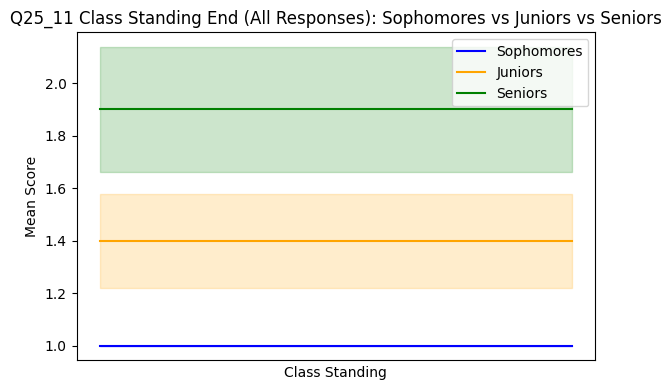

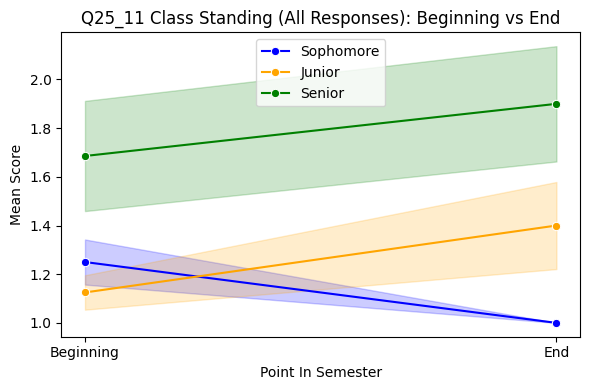

In [ ]:
# graphs and calculates average of Q25_11 end
Q25_11_sophsAvg   = average_list(sophomore_end_Q25_11.tolist())
Q25_11_jrsAvg   = average_list(junior_end_Q25_11.tolist())
Q25_11_srsAvg   = average_list(senior_end_Q25_11.tolist())

Q25_11_sophSTD = np.std(sophomore_end_Q25_11.tolist())
Q25_11_jrSTD = np.std(junior_end_Q25_11.tolist())
Q25_11_srSTD = np.std(senior_end_Q25_11.tolist())


print(f"Q25_11: Soph End Avg: {Q25_11_sophsAvg}")
print(f"Q25_11: Jr End Avg: {Q25_11_jrsAvg}")
print(f"Q25_11: Sr End Avg: {Q25_11_srsAvg}")

print(Q25_11_sophSTD)
print(Q25_11_jrSTD)
print(Q25_11_srSTD)

lineplot_class("Q25_11 Class Standing End (All Responses)", sophs=sophomore_end_Q25_11, jrs=junior_end_Q25_11, srs=senior_end_Q25_11, band_factor=0.2)
lineplot_beg_to_end_class("Q25_11 Class Standing (All Responses)", sophomore_beg_Q25_11, sophomore_end_Q25_11, junior_beg_Q25_11, junior_end_Q25_11, senior_beg_Q25_11, senior_end_Q25_11, band_factor=0.2)


In [ ]:
# Q25_12
# mean for Q25_12
Q25_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_12"].mean()
print("Q25_12 Mean", Q25_12_result, "\n")

# create dataframes for each class level
junior_beg_Q25_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()
senior_beg_Q25_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()
sophomore_beg_Q25_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_12"].dropna()

junior_end_Q25_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_12"].dropna()
senior_end_Q25_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_12"].dropna()
sophomore_end_Q25_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_12, senior_beg_Q25_12, sophomore_end_Q25_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_12, senior_end_Q25_12, sophomore_end_Q25_12)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_12, junior_end_Q25_12)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_12, senior_end_Q25_12)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_12, sophomore_end_Q25_12)

Q25_12 Mean Class Standing Label  B/E?     
Junior                Beginning    4.250000
                      End          4.000000
Senior                Beginning    4.171429
                      End          4.333333
Sophomore             Beginning    4.333333
                      End          4.375000
Name: Q25_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.3293916762415301
P-value: 0.8481516402555288
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.8861111111110918
P-value: 0.38943607198287566
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 25.0
P-value: 0.41722267019020864
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 467.0
P-value: 0.4009856247782738
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 34.5
P-value: 0.9076

In [ ]:
# Q25_13
# mean for Q25_13
Q25_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_13"].mean()
print("Q25_13 Mean", Q25_13_result, "\n")

# create dataframes for each class level
junior_beg_Q25_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()
senior_beg_Q25_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()
sophomore_beg_Q25_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_13"].dropna()

junior_end_Q25_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_13"].dropna()
senior_end_Q25_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_13"].dropna()
sophomore_end_Q25_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_13, senior_beg_Q25_13, sophomore_end_Q25_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_13, senior_end_Q25_13, sophomore_end_Q25_13)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_13, junior_end_Q25_13)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_13, senior_end_Q25_13)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_13, sophomore_end_Q25_13)

Q25_13 Mean Class Standing Label  B/E?     
Junior                Beginning    1.375000
                      End          1.400000
Senior                Beginning    1.600000
                      End          1.966667
Sophomore             Beginning    1.333333
                      End          1.000000
Name: Q25_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.537791570727874
P-value: 0.28114189143603957
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 5.538966465090686
P-value: 0.06269439479518928
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 20.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 431.0
P-value: 0.143173659326375
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 44.0
P-value: 0.19758222862015595
Fail

In [ ]:
# mean for Q25_14
Q25_14_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_14"].mean()
print("Q25_14 Mean", Q25_14_result, "\n")
# Q25_14
# mean for Q25_14
Q25_14_result = data.groupby(["Class Standing Label", "B/E?"])["Q25_14"].mean()
print("Q25_14 Mean", Q25_14_result, "\n")

# create dataframes for each class level
junior_beg_Q25_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()
senior_beg_Q25_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()
sophomore_beg_Q25_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q25_14"].dropna()

junior_end_Q25_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q25_14"].dropna()
senior_end_Q25_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q25_14"].dropna()
sophomore_end_Q25_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q25_14"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q25_14, senior_beg_Q25_14, sophomore_end_Q25_14)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q25_14, senior_end_Q25_14, sophomore_end_Q25_14)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q25_14, junior_end_Q25_14)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q25_14, senior_end_Q25_14)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q25_14, sophomore_end_Q25_14)

Q25_14 Mean Class Standing Label  B/E?     
Junior                Beginning    2.666667
                      End          3.000000
Senior                Beginning    2.687500
                      End          2.400000
Sophomore             Beginning    2.666667
                      End          2.000000
Name: Q25_14, dtype: float64 

Q25_14 Mean Class Standing Label  B/E?     
Junior                Beginning    2.666667
                      End          3.000000
Senior                Beginning    2.687500
                      End          2.400000
Sophomore             Beginning    2.666667
                      End          2.000000
Name: Q25_14, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.5559951308581881
P-value: 0.7572986652093888
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.873194713088324
P-value: 0.6462315799501792
Fail to reject the null hypothesis: No significant difference

In [ ]:
# START OF QUESTION 26

In [ ]:
# Q26_1
# mean for Q26_1
Q26_1_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_1"].mean()
print("Q26_1 Mean", Q26_1_result, "\n")

# create dataframes for each class level
junior_beg_Q26_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()
senior_beg_Q26_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()
sophomore_beg_Q26_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_1"].dropna()

junior_end_Q26_1 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_1"].dropna()
senior_end_Q26_1 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_1"].dropna()
sophomore_end_Q26_1 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_1"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_1, senior_beg_Q26_1, sophomore_end_Q26_1)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_1, senior_end_Q26_1, sophomore_end_Q26_1)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_1, junior_end_Q26_1)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_1, senior_end_Q26_1)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_1, sophomore_end_Q26_1)

Q26_1 Mean Class Standing Label  B/E?     
Junior                Beginning    3.375000
                      End          4.200000
Senior                Beginning    3.323529
                      End          3.500000
Sophomore             Beginning    3.555556
                      End          3.250000
Name: Q26_1, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.14090321061353311
P-value: 0.931972840974197
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 3.520352279455301
P-value: 0.17201456255629985
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 11.5
P-value: 0.2187233999594279
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 466.0
P-value: 0.543640540578308
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 44.5
P-value: 0.413786674

In [ ]:
# Q26_2
# mean for Q26_2
Q26_2_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_2"].mean()
print("Q26_2 Mean", Q26_2_result, "\n")

# create dataframes for each class level
junior_beg_Q26_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()
senior_beg_Q26_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()
sophomore_beg_Q26_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_2"].dropna()

junior_end_Q26_2 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_2"].dropna()
senior_end_Q26_2 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_2"].dropna()
sophomore_end_Q26_2 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_2"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_2, senior_beg_Q26_2, sophomore_end_Q26_2)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_2, senior_end_Q26_2, sophomore_end_Q26_2)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_2, junior_end_Q26_2)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_2, senior_end_Q26_2)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_2, sophomore_end_Q26_2)

Q26_2 Mean Class Standing Label  B/E?     
Junior                Beginning    4.250000
                      End          4.000000
Senior                Beginning    4.057143
                      End          4.133333
Sophomore             Beginning    4.222222
                      End          4.500000
Name: Q26_2, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 2.9272069292833662
P-value: 0.2314009255048659
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 2.048484848484841
P-value: 0.35906838389647167
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 24.0
P-value: 0.57057751055688
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 493.0
P-value: 0.6503693516722298
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.0
P-value: 0.4151293810

In [ ]:
# Q26_3
# mean for Q26_3
Q26_3_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_3"].mean()
print("Q26_3 Mean", Q26_3_result, "\n")

# create dataframes for each class level
junior_beg_Q26_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()
senior_beg_Q26_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()
sophomore_beg_Q26_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_3"].dropna()

junior_end_Q26_3 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_3"].dropna()
senior_end_Q26_3 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_3"].dropna()
sophomore_end_Q26_3 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_3"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_3, senior_beg_Q26_3, sophomore_end_Q26_3)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_3, senior_end_Q26_3, sophomore_end_Q26_3)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_3, junior_end_Q26_3)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_3, senior_end_Q26_3)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_3, sophomore_end_Q26_3)

Q26_3 Mean Class Standing Label  B/E?     
Junior                Beginning    4.875000
                      End          4.600000
Senior                Beginning    4.828571
                      End          4.586207
Sophomore             Beginning    4.888889
                      End          4.750000
Name: Q26_3, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.8290816326531033
P-value: 0.6606435678077168
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.43150143678164465
P-value: 0.8059361819029102
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 22.0
P-value: 0.727009731456113
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 618.5
P-value: 0.03862549183892689
Reject the null hypothesis: Significant differences exists

Sophomores:
Mann-Whitney U-Value: 41.0
P-value: 0.5126907602619235
F

In [ ]:
# Q26_4
# mean for Q26_4
Q26_4_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_4"].mean()
print("Q26_4 Mean", Q26_4_result, "\n")

# create dataframes for each class level
junior_beg_Q26_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()
senior_beg_Q26_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()
sophomore_beg_Q26_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_4"].dropna()

junior_end_Q26_4 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_4"].dropna()
senior_end_Q26_4 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_4"].dropna()
sophomore_end_Q26_4 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_4"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_4, senior_beg_Q26_4, sophomore_end_Q26_4)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_4, senior_end_Q26_4, sophomore_end_Q26_4)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_4, junior_end_Q26_4)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_4, senior_end_Q26_4)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_4, sophomore_end_Q26_4)

Q26_4 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.400000
Senior                Beginning    4.657143
                      End          4.344828
Sophomore             Beginning    4.222222
                      End          4.625000
Name: Q26_4, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 6.805124223602523
P-value: 0.03328787335605274
Reject the null hypothesis: Significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.1181119667439077
P-value: 0.5717485493047351
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 14.0
P-value: 0.3727595974362651
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 646.5
P-value: 0.030671520536901604
Reject the null hypothesis: Significant differences exists

Sophomores:
Mann-Whitney U-Value: 24.0
P-value: 0.2143189276130174
Fail to rej

Q26_4: Soph Beginning Avg: 4.222222222222222
Q26_4: Jr Beginning Avg: 4.0
Q26_4: Sr Beginning Avg: 4.6571428571428575
0.6285393610547089
0.7071067811865476
0.6298687910013886


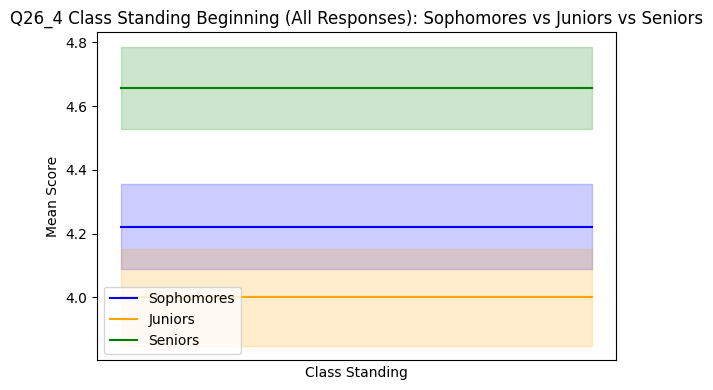

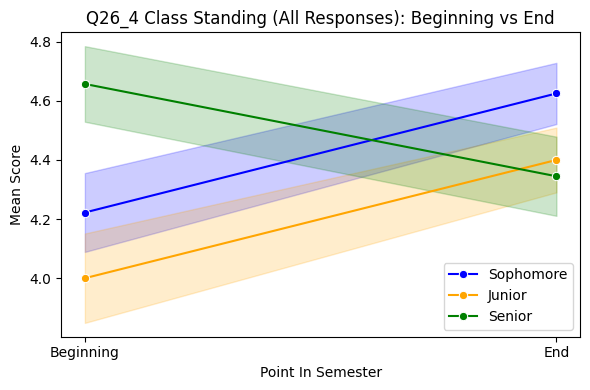

In [ ]:
# calculate average and standard deviation of Q26_4 and graphs beginning
Q26_4_sophsAvg   = average_list(sophomore_beg_Q26_4.tolist())
Q26_4_jrsAvg   = average_list(junior_beg_Q26_4.tolist())
Q26_4_srsAvg   = average_list(senior_beg_Q26_4.tolist())

Q4_6_sophSTD = np.std(sophomore_beg_Q26_4.tolist())
Q4_6_jrSTD = np.std(junior_beg_Q26_4.tolist())
Q4_6_srSTD = np.std(senior_beg_Q26_4.tolist())


print(f"Q26_4: Soph Beginning Avg: {Q26_4_sophsAvg}")
print(f"Q26_4: Jr Beginning Avg: {Q26_4_jrsAvg}")
print(f"Q26_4: Sr Beginning Avg: {Q26_4_srsAvg}")

print(Q4_6_sophSTD)
print(Q4_6_jrSTD)
print(Q4_6_srSTD)
lineplot_class("Q26_4 Class Standing Beginning (All Responses)", sophs=sophomore_beg_Q26_4, jrs=junior_beg_Q26_4, srs=senior_beg_Q26_4, band_factor=0.2)
lineplot_beg_to_end_class("Q26_4 Class Standing (All Responses)", sophomore_beg_Q26_4, sophomore_end_Q26_4, junior_beg_Q26_4, junior_end_Q26_4, senior_beg_Q26_4, senior_end_Q26_4, band_factor=0.2)

In [ ]:
# Q26_5
# mean for Q26_5
Q26_5_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_5"].mean()
print("Q26_5 Mean", Q26_5_result, "\n")

# create dataframes for each class level
junior_beg_Q26_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()
senior_beg_Q26_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()
sophomore_beg_Q26_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_5"].dropna()

junior_end_Q26_5 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_5"].dropna()
senior_end_Q26_5 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_5"].dropna()
sophomore_end_Q26_5 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_5"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_5, senior_beg_Q26_5, sophomore_end_Q26_5)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_5, senior_end_Q26_5, sophomore_end_Q26_5)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_5, junior_end_Q26_5)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_5, senior_end_Q26_5)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_5, sophomore_end_Q26_5)

Q26_5 Mean Class Standing Label  B/E?     
Junior                Beginning    4.875000
                      End          4.800000
Senior                Beginning    4.714286
                      End          4.500000
Sophomore             Beginning    4.666667
                      End          4.750000
Name: Q26_5, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.5006042305604868
P-value: 0.7785655309929866
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.428225806451612
P-value: 0.4896262650801848
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 21.5
P-value: 0.8153345943552277
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 615.0
P-value: 0.14579317020222168
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 33.0
P-value: 0.76090672

In [ ]:
# Q26_6
# mean for Q26_6
Q26_6_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_6"].mean()
print("Q26_6 Mean", Q26_6_result, "\n")

# create dataframes for each class level
junior_beg_Q26_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()
senior_beg_Q26_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()
sophomore_beg_Q26_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_6"].dropna()

junior_end_Q26_6 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_6"].dropna()
senior_end_Q26_6 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_6"].dropna()
sophomore_end_Q26_6 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_6"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_6, senior_beg_Q26_6, sophomore_end_Q26_6)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_6, senior_end_Q26_6, sophomore_end_Q26_6)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_6, junior_end_Q26_6)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_6, senior_end_Q26_6)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_6, sophomore_end_Q26_6)

Q26_6 Mean Class Standing Label  B/E?     
Junior                Beginning    3.625000
                      End          3.800000
Senior                Beginning    3.628571
                      End          3.566667
Sophomore             Beginning    3.666667
                      End          3.625000
Name: Q26_6, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.019284181177737704
P-value: 0.990404245321991
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.2429199965992023
P-value: 0.8856264792054018
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 17.5
P-value: 0.7541057159005572
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 538.0
P-value: 0.8641744053112314
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 39.0
P-value: 0.7944962

In [ ]:
# Q26_7
# mean for Q26_7
Q26_7_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_7"].mean()
print("Q26_7 Mean", Q26_7_result, "\n")

# create dataframes for each class level
junior_beg_Q26_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()
senior_beg_Q26_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()
sophomore_beg_Q26_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_7"].dropna()

junior_end_Q26_7 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_7"].dropna()
senior_end_Q26_7 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_7"].dropna()
sophomore_end_Q26_7 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_7"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_7, senior_beg_Q26_7, sophomore_end_Q26_7)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_7, senior_end_Q26_7, sophomore_end_Q26_7)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_7, junior_end_Q26_7)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_7, senior_end_Q26_7)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_7, sophomore_end_Q26_7)

Q26_7 Mean Class Standing Label  B/E?     
Junior                Beginning    3.750000
                      End          4.200000
Senior                Beginning    4.028571
                      End          3.866667
Sophomore             Beginning    3.888889
                      End          4.000000
Name: Q26_7, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.44926999963456316
P-value: 0.7988077305228148
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.1915717900063116
P-value: 0.5511292658898319
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 15.0
P-value: 0.4702931454063959
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 582.5
P-value: 0.4255645631093855
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.5
P-value: 0.7189262

In [ ]:
# Q26_8
# mean for Q26_8
Q26_8_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_8"].mean()
print("Q26_8 Mean", Q26_8_result, "\n")

# create dataframes for each class level
junior_beg_Q26_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()
senior_beg_Q26_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()
sophomore_beg_Q26_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_8"].dropna()

junior_end_Q26_8 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_8"].dropna()
senior_end_Q26_8 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_8"].dropna()
sophomore_end_Q26_8 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_8"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_8, senior_beg_Q26_8, sophomore_end_Q26_8)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_8, senior_end_Q26_8, sophomore_end_Q26_8)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_8, junior_end_Q26_8)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_8, senior_end_Q26_8)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_8, sophomore_end_Q26_8)

Q26_8 Mean Class Standing Label  B/E?     
Junior                Beginning    3.000000
                      End          3.600000
Senior                Beginning    2.914286
                      End          3.300000
Sophomore             Beginning    2.888889
                      End          3.250000
Name: Q26_8, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 1.347151326328058
P-value: 0.5098821475698219
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.34240451388888826
P-value: 0.8426511241933142
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 14.0
P-value: 0.37988363759163013
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 400.0
P-value: 0.07896334255881642
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 28.5
P-value: 0.458940

In [ ]:
# Q26_9
# mean for Q26_9
Q26_9_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_9"].mean()
print("Q26_9 Mean", Q26_9_result, "\n")

# create dataframes for each class level
junior_beg_Q26_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()
senior_beg_Q26_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()
sophomore_beg_Q26_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_9"].dropna()

junior_end_Q26_9 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_9"].dropna()
senior_end_Q26_9 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_9"].dropna()
sophomore_end_Q26_9 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_9"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_9, senior_beg_Q26_9, sophomore_end_Q26_9)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_9, senior_end_Q26_9, sophomore_end_Q26_9)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_9, junior_end_Q26_9)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_9, senior_end_Q26_9)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_9, sophomore_end_Q26_9)

Q26_9 Mean Class Standing Label  B/E?     
Junior                Beginning    4.375000
                      End          4.600000
Senior                Beginning    4.171429
                      End          4.066667
Sophomore             Beginning    3.555556
                      End          3.625000
Name: Q26_9, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 3.932585680794871
P-value: 0.13997480450401698
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 4.70592262696092
P-value: 0.09508716198148837
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 18.5
P-value: 0.8662567519801335
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 555.5
P-value: 0.6717589125702913
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 35.5
P-value: 1.0
Fail to

In [ ]:
# Q26_10
# mean for Q26_10
Q26_10_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_10"].mean()
print("Q26_10 Mean", Q26_10_result, "\n")

# create dataframes for each class level
junior_beg_Q26_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()
senior_beg_Q26_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()
sophomore_beg_Q26_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_10"].dropna()

junior_end_Q26_10 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_10"].dropna()
senior_end_Q26_10 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_10"].dropna()
sophomore_end_Q26_10 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_10"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_10, senior_beg_Q26_10, sophomore_end_Q26_10)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_10, senior_end_Q26_10, sophomore_end_Q26_10)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_10, junior_end_Q26_10)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_10, senior_end_Q26_10)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_10, sophomore_end_Q26_10)

Q26_10 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          4.000000
Senior                Beginning    3.114286
                      End          3.566667
Sophomore             Beginning    3.666667
                      End          3.625000
Name: Q26_10, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.801024955436739
P-value: 0.09067147427044364
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 0.9199395770392611
P-value: 0.6313027178084897
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 20.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 415.5
P-value: 0.13236278845600216
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 40.5
P-value: 0.661602332437546
Fail

In [ ]:
# Q26_11
# mean for Q26_11
Q26_11_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_11"].mean()
print("Q26_11 Mean", Q26_11_result, "\n")

# create dataframes for each class level
junior_beg_Q26_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()
senior_beg_Q26_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()
sophomore_beg_Q26_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_11"].dropna()

junior_end_Q26_11 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_11"].dropna()
senior_end_Q26_11 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_11"].dropna()
sophomore_end_Q26_11 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_11"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_11, senior_beg_Q26_11, sophomore_end_Q26_11)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_11, senior_end_Q26_11, sophomore_end_Q26_11)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_11, junior_end_Q26_11)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_11, senior_end_Q26_11)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_11, sophomore_end_Q26_11)

Q26_11 Mean Class Standing Label  B/E?     
Junior                Beginning    2.875000
                      End          2.800000
Senior                Beginning    3.028571
                      End          3.133333
Sophomore             Beginning    3.222222
                      End          3.250000
Name: Q26_11, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.742698224629495
P-value: 0.6898030807672546
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.1057172788872862
P-value: 0.5753028740156962
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 21.0
P-value: 0.936165350403318
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 501.5
P-value: 0.7440746991348948
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 35.0
P-value: 0.95733574

In [ ]:
# Q26_12
# mean for Q26_12
Q26_12_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_12"].mean()
print("Q26_12 Mean", Q26_12_result, "\n")

# create dataframes for each class level
junior_beg_Q26_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()
senior_beg_Q26_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()
sophomore_beg_Q26_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_12"].dropna()

junior_end_Q26_12 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_12"].dropna()
senior_end_Q26_12 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_12"].dropna()
sophomore_end_Q26_12 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_12"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_12, senior_beg_Q26_12, sophomore_end_Q26_12)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_12, senior_end_Q26_12, sophomore_end_Q26_12)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_12, junior_end_Q26_12)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_12, senior_end_Q26_12)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_12, sophomore_end_Q26_12)

Q26_12 Mean Class Standing Label  B/E?     
Junior                Beginning    4.750000
                      End          4.600000
Senior                Beginning    4.676471
                      End          4.566667
Sophomore             Beginning    4.777778
                      End          4.875000
Name: Q26_12, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 0.756617647058767
P-value: 0.6850189180367422
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.7948717948717816
P-value: 0.4076134837115938
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 20.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 560.0
P-value: 0.4121404621342428
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 32.5
P-value: 0.6625205835400576
Fail 

In [ ]:
# Q26_13
# mean for Q26_13
Q26_13_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_13"].mean()
print("Q26_13 Mean", Q26_13_result, "\n")

# create dataframes for each class level
junior_beg_Q26_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()
senior_beg_Q26_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()
sophomore_beg_Q26_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_13"].dropna()

junior_end_Q26_13 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_13"].dropna()
senior_end_Q26_13 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_13"].dropna()
sophomore_end_Q26_13 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_13"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_13, senior_beg_Q26_13, sophomore_end_Q26_13)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_13, senior_end_Q26_13, sophomore_end_Q26_13)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_13, junior_end_Q26_13)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_13, senior_end_Q26_13)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_13, sophomore_end_Q26_13)

Q26_13 Mean Class Standing Label  B/E?     
Junior                Beginning    3.000000
                      End          3.000000
Senior                Beginning    2.857143
                      End          2.900000
Sophomore             Beginning    3.222222
                      End          3.625000
Name: Q26_13, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.94639489603486
P-value: 0.08431483523537633
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 3.956632653061216
P-value: 0.13830189662889186
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 20.0
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 497.0
P-value: 0.689708130888264
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 30.0
P-value: 0.5609280344776656
Fail t

In [ ]:
# Q26_14
# mean for Q26_14
Q26_14_result = data.groupby(["Class Standing Label", "B/E?"])["Q26_14"].mean()
print("Q26_14 Mean", Q26_14_result, "\n")

# create dataframes for each class level
junior_beg_Q26_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()
senior_beg_Q26_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()
sophomore_beg_Q26_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "Beginning")]["Q26_14"].dropna()

junior_end_Q26_14 = data[(data["Class Standing Label"] == "Junior") & (data["B/E?"] == "End")]["Q26_14"].dropna()
senior_end_Q26_14 = data[(data["Class Standing Label"] == "Senior") & (data["B/E?"] == "End")]["Q26_14"].dropna()
sophomore_end_Q26_14 = data[(data["Class Standing Label"] == "Sophomore") & (data["B/E?"] == "End")]["Q26_14"].dropna()

# Kruskal-Wallis Test for Beginning Class Level
print("Beginning Class Level:")
kruskalTest(junior_beg_Q26_14, senior_beg_Q26_14, sophomore_end_Q26_14)

# Kruskal-Wallis Test for End Class Level
print("End Class Level:")
kruskalTest(junior_end_Q26_14, senior_end_Q26_14, sophomore_end_Q26_14)

# U-Test for Juniors
print("Juniors:")
UTest(junior_beg_Q26_14, junior_end_Q26_14)

# U-Test for Seniors
print("Seniors:")
UTest(senior_beg_Q26_14, senior_end_Q26_14)

# U-Test for Sophomores
print("Sophomores:")
UTest(sophomore_beg_Q26_14, sophomore_end_Q26_14)

Q26_14 Mean Class Standing Label  B/E?     
Junior                Beginning    4.000000
                      End          3.000000
Senior                Beginning    2.923077
                      End          2.769231
Sophomore             Beginning    3.250000
                      End          1.000000
Name: Q26_14, dtype: float64 

Beginning Class Level:
Kruskal-Wallis H-Statistic: 4.15498549924044
P-value: 0.12524383652362253
Fail to reject the null hypothesis: No significant differences exists 

End Class Level:
Kruskal-Wallis H-Statistic: 1.7977151561309967
P-value: 0.40703439925154994
Fail to reject the null hypothesis: No significant differences exists 

Juniors:
Mann-Whitney U-Value: 1.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Seniors:
Mann-Whitney U-Value: 84.5
P-value: 1.0
Fail to reject the null hypothesis: No significant differences exists

Sophomores:
Mann-Whitney U-Value: 4.0
P-value: 0.2356799134290375
Fail to reject the nul